In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_051_f254.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_079_f334.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_080_f397.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_088_f1073.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_020_f146.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_026_f751.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_054_f643.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_026_f269.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_062_f84.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_056_f33.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_010_f368.jpg
/kaggle/input/frames-film-vietnam-dataset/Frame_Test/Dia_Dao/scene_006_f247.jpg
/kaggle/input/frames-film-vietnam-dataset

In [1]:
!pip install -q faiss-cpu
!pip install -q tensorflow==2.18.0
!pip install -q skl2onnx onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 56.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 97.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.2 which is incompatible.
google-spark-connect 0.5.2 requires google-api-core>=2.19.1, but you have google-api-core 1.34.1 whi

In [2]:
import tensorflow as tf
import os

# Kiểm tra phiên bản TensorFlow
print(f"TensorFlow version: {tf.__version__}")

# Cấu hình memory growth để sử dụng GPU hiệu quả
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Tìm thấy {len(gpus)} GPU:")
    for i, gpu in enumerate(gpus):
        print(f"  GPU {i}: {gpu}")
    
    # Cấu hình memory growth
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        
        # Một số tùy chọn để tối ưu hiệu suất cho GPU T4
        os.environ['TF_GPU_THREAD_MODE'] = 'gpu_private'
        os.environ['TF_GPU_THREAD_COUNT'] = '2'  # Tương ứng với số GPU
        
        # Hiển thị các GPU logic
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"Số lượng GPU vật lý: {len(gpus)}, số lượng GPU logic: {len(logical_gpus)}")
        
        # Thông tin chi tiết về GPU
        from tensorflow.python.client import device_lib
        local_device_protos = device_lib.list_local_devices()
        gpu_list = [x.name for x in local_device_protos if x.device_type == 'GPU']
        print(f"Danh sách GPU: {gpu_list}")
        
        # Hiển thị thông tin CUDA và cuDNN
        build_info = tf.sysconfig.get_build_info()
        print(f"CUDA version: {build_info.get('cuda_version', 'N/A')}")
        print(f"cuDNN version: {build_info.get('cudnn_version', 'N/A')}")
        
        # Kiểm tra xem GPU có thực sự được sử dụng hay không
        print("\nXác nhận GPU đang hoạt động bằng phép tính nhỏ:")
        with tf.device('/GPU:0'):
            a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
            b = tf.constant([[5.0, 6.0], [7.0, 8.0]])
            c = tf.matmul(a, b)
            print(f"Tính toán trên GPU: {c}")
            print(f"Đang chạy trên thiết bị: {c.device}")
    
    except RuntimeError as e:
        print(f"Lỗi khi cấu hình GPU: {e}")
else:
    print("Không tìm thấy GPU! Đang sử dụng CPU.")
    
    # Kiểm tra thông tin CPU
    cpu_devices = tf.config.list_physical_devices('CPU')
    print(f"Tìm thấy {len(cpu_devices)} CPU: {cpu_devices}")

2025-05-25 11:55:43.829466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748174144.020585      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748174144.080578      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.18.0
Tìm thấy 1 GPU:
  GPU 0: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Số lượng GPU vật lý: 1, số lượng GPU logic: 1
Danh sách GPU: ['/device:GPU:0']
CUDA version: 12.5.1
cuDNN version: 9

Xác nhận GPU đang hoạt động bằng phép tính nhỏ:
Tính toán trên GPU: [[19. 22.]
 [43. 50.]]
Đang chạy trên thiết bị: /job:localhost/replica:0/task:0/device:GPU:0


I0000 00:00:1748174155.664735      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1748174155.666933      31 gpu_device.cc:2022] Created device /device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [3]:
import glob
import matplotlib.pyplot as plt
import cv2
import random
import pandas as pd
import os
from PIL import Image
import warnings
import gc
import numpy as np
import csv
import time
import seaborn as sns
from tqdm import tqdm 
import shutil

import tensorflow.keras.layers as L
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, Dropout, AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, Resizing
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization, Attention, Reshape, RepeatVector, Lambda, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib

import onnxruntime as ort
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Bỏ qua các cảnh báo
warnings.filterwarnings("ignore")

# In phiên bản TensorFlow hiện tại
print('TensorFlow Version ' + tf.__version__)

def seed_everything(seed=0):
    # Thiết lập seed để đảm bảo tính tái lập (reproducibility)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Gọi hàm seed_everything để thiết lập seed mặc định
seed_everything()

TensorFlow Version 2.18.0


# Trực quan dữ liệu

In [4]:
def count_images_per_folder(root_dir, image_extensions=None):
    if image_extensions is None:
        image_extensions = ['.jpg']

    total = 0
    for subdir, dirs, files in os.walk(root_dir):
        count = sum(1 for file in files if any(file.lower().endswith(ext) for ext in image_extensions))
        if count > 0:
            relative_path = os.path.relpath(subdir, root_dir)
            # print(f"Thư mục '{relative_path}': {count} ảnh")
            total += count

    print(f"==> Tổng số ảnh: {total}")

print("====Thư mục Train====")
folder_train_path = '/kaggle/input/movies-dataset-1/Process_Frames_1/Train'
count_images_per_folder(folder_train_path)

print("====Thư mục Test====")
folder_test_path = '/kaggle/input/movies-dataset-1/Process_Frames_1/Test'
count_images_per_folder(folder_test_path)

====Thư mục Train====
==> Tổng số ảnh: 51210
====Thư mục Test====
==> Tổng số ảnh: 16864


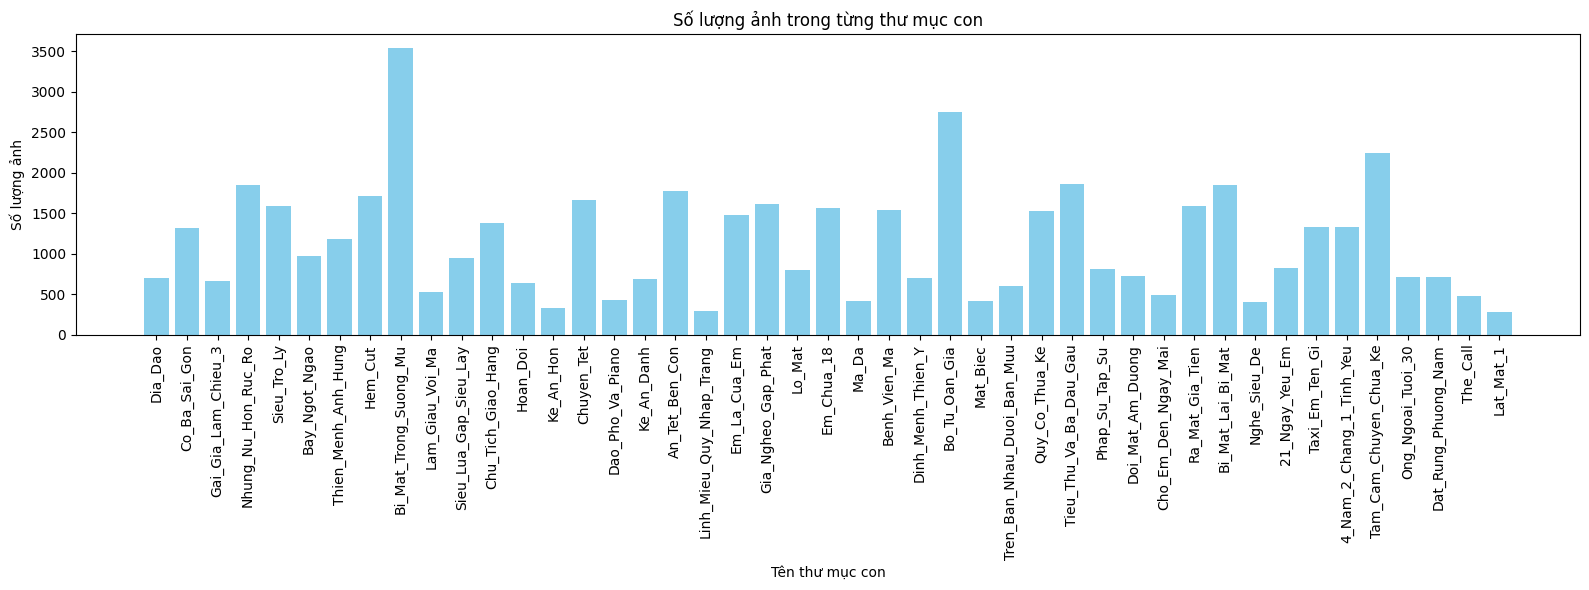

In [5]:
def count_images_per_folder(root_dir, image_extensions=None):
    if image_extensions is None:
        image_extensions = ['.jpg']

    folder_counts = {}
    for subdir, dirs, files in os.walk(root_dir):
        if subdir == root_dir:
            continue  # bỏ qua thư mục gốc
        count = sum(1 for file in files if any(file.lower().endswith(ext) for ext in image_extensions))
        if count > 0:
            folder_name = os.path.basename(subdir)
            folder_counts[folder_name] = count

    return folder_counts

def plot_image_counts(folder_counts):
    folders = list(folder_counts.keys())
    counts = list(folder_counts.values())

    plt.figure(figsize=(16, 6))
    plt.bar(folders, counts, color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Tên thư mục con')
    plt.ylabel('Số lượng ảnh')
    plt.title('Số lượng ảnh trong từng thư mục con')
    plt.tight_layout()
    plt.show()

# Tập Train
counts = count_images_per_folder(folder_train_path)
plot_image_counts(counts)

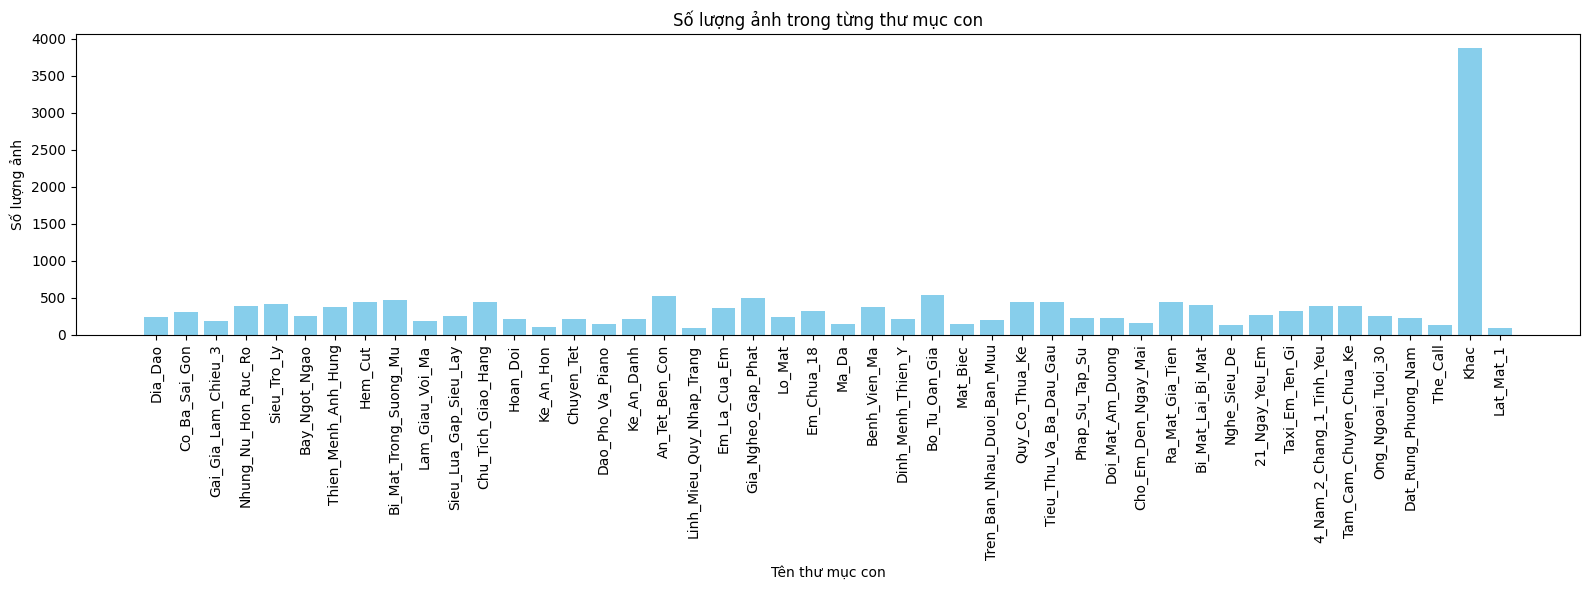

In [6]:
# Tập Test
counts = count_images_per_folder(folder_test_path)
plot_image_counts(counts)

# Tạo tập dữ liệu

In [7]:
image_size = 128
n_classes = 42
batch_size = 128

classes = {
    1: "21_Ngay_Yeu_Em", 2: "4_Nam_2_Chang_1_Tinh_Yeu", 3: "An_Tet_Ben_Con", 4: "Bay_Ngot_Ngao", 5: "Benh_Vien_Ma",
    6: "Bi_Mat_Lai_Bi_Mat", 7: "Bi_Mat_Trong_Suong_Mu", 8: "Bo_Tu_Oan_Gia", 9: "Cho_Em_Den_Ngay_Mai", 10: "Chu_Tich_Giao_Hang",
    11: "Chuyen_Tet", 12: "Co_Ba_Sai_Gon", 13: "Dao_Pho_Va_Piano", 14: "Dat_Rung_Phuong_Nam", 15: "Dia_Dao",
    16: "Dinh_Menh_Thien_Y", 17: "Doi_Mat_Am_Duong", 18: "Em_Chua_18", 19: "Em_La_Cua_Em", 20: "Gai_Gia_Lam_Chieu_3",
    21: "Gia_Ngheo_Gap_Phat", 22: "Hem_Cut", 23: "Hoan_Doi", 24: "Ke_An_Danh", 25: "Ke_An_Hon",
    26: "Lam_Giau_Voi_Ma", 27: "Lat_Mat_1", 28: "Linh_Mieu_Quy_Nhap_Trang", 29: "Lo_Mat", 30: "Ma_Da",
    31: "Mat_Biec", 32: "Nghe_Sieu_De", 33: "Nhung_Nu_Hon_Ruc_Ro", 34: "Ong_Ngoai_Tuoi_30", 35: "Phap_Su_Tap_Su",
    36: "Quy_Co_Thua_Ke", 37: "Ra_Mat_Gia_Tien", 38: "Sieu_Lua_Gap_Sieu_Lay", 39: "Sieu_Tro_Ly", 40: "Tam_Cam_Chuyen_Chua_Ke",
    41: "Taxi_Em_Ten_Gi", 42: "The_Call", 43: "Thien_Menh_Anh_Hung", 44: "Tieu_Thu_Va_Ba_Dau_Gau", 45: "Tren_Ban_Nhau_Duoi_Ban_Muu"
}

In [8]:
train_path = '/kaggle/input/movies-dataset-1/Process_Frames_1/Train'

train_df = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',  
    seed=1,
    image_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False, 
)

Found 51210 files belonging to 45 classes.


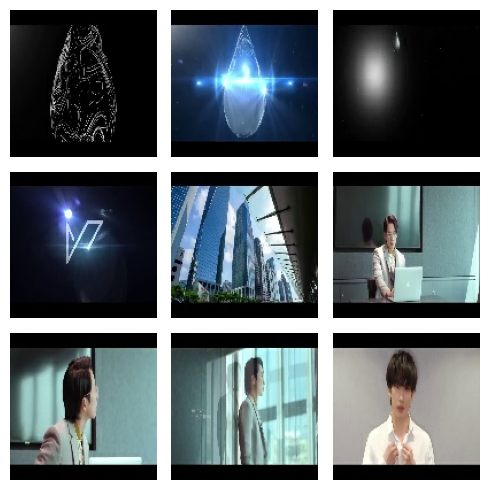

In [9]:
images, labels = next(iter(train_df))  

fig, axes = plt.subplots(3, 3, figsize=(5, 5))
axes = axes.flatten()

for img, ax in zip(images[:9], axes): 
    ax.imshow(img.numpy().astype("uint8"))  
    ax.axis('off')

plt.tight_layout()
plt.show()

# Xóa file trong thư mục

In [9]:
def delete_all_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)  # xóa file hoặc symbolic link
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)  # xóa thư mục và toàn bộ nội dung bên trong
        except Exception as e:
            print(f"Không thể xóa {file_path}: {e}")

# Ví dụ:
folder = "/kaggle/working/"
delete_all_in_folder(folder)

In [25]:
gc.collect()
tf.keras.backend.clear_session()

# Resnet50 + KNN

In [31]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Số batch
num_batches = tf.data.experimental.cardinality(train_df).numpy()

strategy = tf.distribute.MirroredStrategy()

# Khởi tạo model trong context của strategy
with strategy.scope():
    base_model_resnet50 = ResNet50(
        include_top=False,
        weights='imagenet',
        pooling='avg',
        input_shape=(image_size, image_size, 3)
    )

# Nơi lưu đặc trưng và nhãn
all_features = []
all_labels = []

# Lặp qua từng batch
for images, labels in tqdm(train_df, total=num_batches, desc="Extracting features"):
    images_pp = preprocess_input(images)
    features_batch = base_model_resnet50(images_pp, training=False)
    all_features.append(features_batch.numpy())
    all_labels.append(labels.numpy())

# Đánh nhãn ứng với đặc trưng
features_array = np.concatenate(all_features, axis=0)
labels_array = np.concatenate(all_labels, axis=0)

Extracting features: 100%|██████████| 312/312 [01:08<00:00,  4.53it/s]


In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(features_array, labels_array)

# Chuyển đổi mô hình KNN sang ONNX
onnx_model = convert_sklearn(
    knn, 
    initial_types=[('input', FloatTensorType([None, features_array.shape[1]]))],
    options={id(knn): {'zipmap': False}}  
)

# Lưu mô hình dưới dạng ONNX
with open("knn_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Mô hình KNN đã được lưu dưới dạng ONNX.")

Mô hình KNN đã được lưu dưới dạng ONNX.


✅ Mô hình ONNX đã được tải thành công!


Testing with KNN: 100%|██████████| 2100/2100 [11:11<00:00,  3.13it/s]



✅ Accuracy: 83.19%
✅ Đúng: 1747 / ❌ Sai: 353


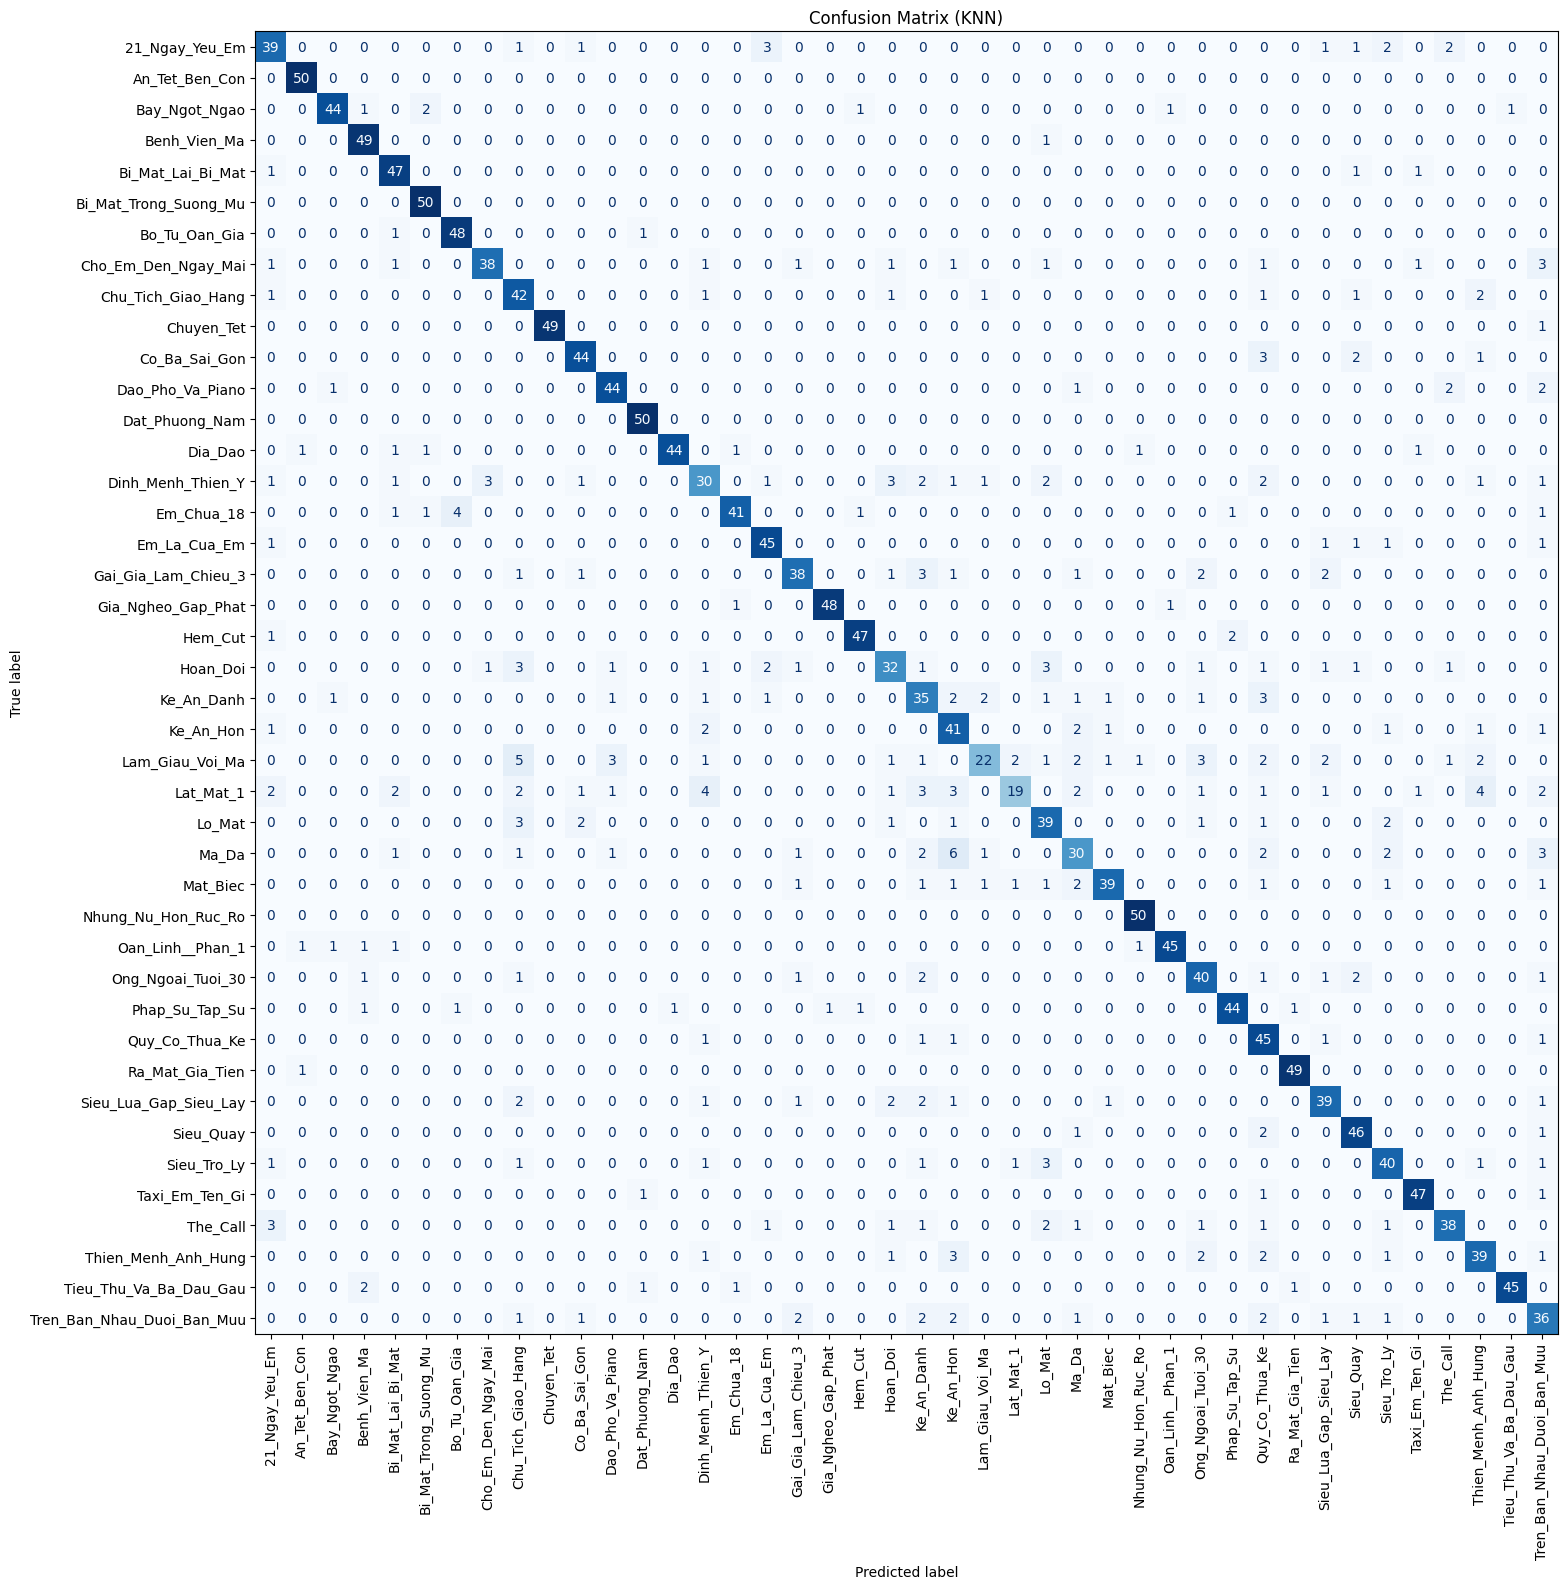


🖼️ Confusion matrix đã được lưu vào 'confusion_matrix_knn.jpg'

📄 Classification Report:
                            precision    recall  f1-score  accuracy
21_Ngay_Yeu_Em               0.750000  0.780000  0.764706  0.831905
An_Tet_Ben_Con               0.943396  1.000000  0.970874  0.831905
Bay_Ngot_Ngao                0.936170  0.880000  0.907216  0.831905
Benh_Vien_Ma                 0.890909  0.980000  0.933333  0.831905
Bi_Mat_Lai_Bi_Mat            0.839286  0.940000  0.886792  0.831905
Bi_Mat_Trong_Suong_Mu        0.925926  1.000000  0.961538  0.831905
Bo_Tu_Oan_Gia                0.905660  0.960000  0.932039  0.831905
Cho_Em_Den_Ngay_Mai          0.904762  0.760000  0.826087  0.831905
Chu_Tich_Giao_Hang           0.666667  0.840000  0.743363  0.831905
Chuyen_Tet                   1.000000  0.980000  0.989899  0.831905
Co_Ba_Sai_Gon                0.862745  0.880000  0.871287  0.831905
Dao_Pho_Va_Piano             0.862745  0.880000  0.871287  0.831905
Dat_Phuong_Nam            

In [33]:
# Cài đặt các tham số
image_size = 128
test_path = "/kaggle/input/frames-film-vietnam-dataset/Frame_Test"
onnx_model_path = "/kaggle/working/knn_model.onnx"
confusion_output_path = "confusion_matrix_knn.jpg"
csv_output_path = "classification_report_knn.csv"
n_per_class = 50 

# ==== Load mô hình và ONNX ====
model = ResNet50(include_top=False, weights='imagenet', pooling='avg', input_shape=(image_size, image_size, 3))

# Kiểm tra đường dẫn mô hình ONNX
if not os.path.exists(onnx_model_path):
    print(f"❌ Không tìm thấy mô hình ONNX tại: {onnx_model_path}")

# Khởi tạo session ONNX với providers rõ ràng
try:
    # Kiểm tra GPU, nếu có sẽ sử dụng CUDA
    providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if 'CUDAExecutionProvider' in ort.get_available_providers() else ['CPUExecutionProvider']
    onnx_session = ort.InferenceSession(onnx_model_path, providers=providers)
    
    # In thông tin đầu vào để kiểm tra
    input_details = onnx_session.get_inputs()[0]
    print(f"✅ Mô hình ONNX đã được tải thành công!")
    # print(f"   - Tên đầu vào: {input_details.name}")
    # print(f"   - Hình dạng đầu vào: {input_details.shape}")
    # print(f"   - Kiểu dữ liệu đầu vào: {input_details.type}")
except Exception as e:
    print(f"❌ Lỗi khi tải mô hình ONNX: {e}")

# ==== Mapping classes ====
classes = {
    1: "21_Ngay_Yeu_Em", 2: "An_Tet_Ben_Con", 3: "Bay_Ngot_Ngao", 4: "Benh_Vien_Ma",
    5: "Bi_Mat_Lai_Bi_Mat", 6: "Bi_Mat_Trong_Suong_Mu", 7: "Bo_Tu_Oan_Gia", 8: "Cho_Em_Den_Ngay_Mai",
    9: "Chu_Tich_Giao_Hang", 10: "Chuyen_Tet", 11: "Co_Ba_Sai_Gon", 12: "Dao_Pho_Va_Piano",
    13: "Dat_Phuong_Nam", 14: "Dia_Dao", 15: "Dinh_Menh_Thien_Y", 16: "Em_Chua_18",
    17: "Em_La_Cua_Em", 18: "Gai_Gia_Lam_Chieu_3", 19: "Gia_Ngheo_Gap_Phat", 20: "Hem_Cut",
    21: "Hoan_Doi", 22: "Ke_An_Danh", 23: "Ke_An_Hon", 24: "Lam_Giau_Voi_Ma",
    25: "Lat_Mat_1", 26: "Lo_Mat", 27: "Ma_Da", 28: "Mat_Biec",
    29: "Nhung_Nu_Hon_Ruc_Ro", 30: "Oan_Linh__Phan_1", 31: "Ong_Ngoai_Tuoi_30",
    32: "Phap_Su_Tap_Su", 33: "Quy_Co_Thua_Ke", 34: "Ra_Mat_Gia_Tien",
    35: "Sieu_Lua_Gap_Sieu_Lay", 36: "Sieu_Quay", 37: "Sieu_Tro_Ly",
    38: "Taxi_Em_Ten_Gi", 39: "The_Call", 40: "Thien_Menh_Anh_Hung",
    41: "Tieu_Thu_Va_Ba_Dau_Gau", 42: "Tren_Ban_Nhau_Duoi_Ban_Muu"
}
class_to_idx = {name: idx for idx, name in classes.items()}
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

# ==== Duyệt tập test và lấy ảnh từ mỗi thư mục ====
y_true = []
y_pred = []
all_images = []

for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Lấy danh sách ảnh trong thư mục này
    image_files = [
        os.path.join(class_dir, f)
        for f in os.listdir(class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    # Lấy ngẫu nhiên n ảnh từ folder (hoặc ít hơn nếu không đủ)
    selected_images = random.sample(image_files, min(n_per_class, len(image_files)))
    all_images.extend(selected_images)

# ==== Dự đoán ====
for img_path in tqdm(all_images, desc="Testing with KNN"):
    try:
        folder_name = os.path.basename(os.path.dirname(img_path))
        if folder_name not in class_to_idx:
            print(f"❌ Folder không hợp lệ: {folder_name}")
            continue

        img = image.load_img(img_path, target_size=(image_size, image_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Trích đặc trưng với ResNet50
        feature = model.predict(x, verbose=0)
        
        if feature.ndim > 2:
            feature = feature.reshape(1, -1)
        
        # Vì chúng ta đảm bảo đầu vào là float32 để tránh lỗi kiểu dữ liệu
        feature = feature.astype(np.float32)

        # Lấy tên đầu vào từ mô hình ONNX để đảm bảo đúng
        input_name = onnx_session.get_inputs()[0].name
        
        # Dự đoán với mô hình ONNX
        outputs = onnx_session.run(None, {input_name: feature})
        
        if outputs[0].ndim == 2:  
            pred_label = np.argmax(outputs[0][0]) + 1 
        else:
            pred_label = outputs[0][0]

        y_true.append(class_to_idx[folder_name])
        y_pred.append(pred_label)
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")
        print(f"  Hình dạng đặc trưng: {feature.shape}, Kiểu dữ liệu: {feature.dtype}")

# print(f"Hình dạng đầu ra: {[output.shape for output in outputs]}")
# print(f"Kiểu đầu ra: {[output.dtype for output in outputs]}")
# print(f"Giá trị đầu ra đầu tiên: {outputs[0][0]}")

# ==== Đánh giá ====
if len(y_true) == 0:
    print("❌ Không có dữ liệu để đánh giá!")
else:
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1) + 1
    accuracy = np.mean(y_true == y_pred)

    print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")
    print(f"✅ Đúng: {np.sum(y_true == y_pred)} / ❌ Sai: {np.sum(y_true != y_pred)}")

    # ==== Confusion Matrix ====
    cm = confusion_matrix(y_true, y_pred)
    class_labels = [classes[i] for i in sorted(classes.keys())]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    fig, ax = plt.subplots(figsize=(16, 16))
    disp.plot(xticks_rotation=90, cmap='Blues', ax=ax, colorbar=False)
    plt.title("Confusion Matrix (KNN)")
    plt.tight_layout()
    plt.savefig(confusion_output_path, dpi=300)
    plt.show()
    print(f"\n🖼️ Confusion matrix đã được lưu vào '{confusion_output_path}'")

    # ==== Classification Report ====
    print("\n📄 Classification Report:")
    report = classification_report(
        y_true, y_pred, target_names=class_labels,
        digits=2, output_dict=True
    )

    # Chuyển báo cáo phân loại thành DataFrame
    report_df = pd.DataFrame(report).transpose()
    if "accuracy" not in report_df.columns:
        report_df["accuracy"] = accuracy
    print(report_df[["precision", "recall", "f1-score", "accuracy"]])

    # Hiển thị các tham số chung cho toàn bộ chương trình
    avg_precision = np.mean(report_df['precision'])
    avg_recall = np.mean(report_df['recall'])
    avg_f1 = np.mean(report_df['f1-score'])

    print("\n📝 Các tham số đánh giá chung:")
    print(f"  - Precision: {avg_precision:.2f}")
    print(f"  - Recall: {avg_recall:.2f}")
    print(f"  - F1-score: {avg_f1:.2f}")
    print(f"  - Accuracy: {accuracy * 100:.2f}%")

    # Lưu báo cáo chi tiết vào tệp CSV
    report_df.to_csv(csv_output_path, index=True)
    print(f"\n📊 Báo cáo phân loại đã được lưu vào '{csv_output_path}'")

    # Lưu các tham số đánh giá chung vào tệp CSV
    evaluation_metrics = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1-score': avg_f1,
        'accuracy': accuracy
    }

    evaluation_df = pd.DataFrame([evaluation_metrics])
    evaluation_df.to_csv('evaluation_metrics_knn.csv', index=False)
    print(f"\n📊 Các tham số đánh giá chung đã được lưu vào 'evaluation_metrics_knn.csv'")

    # Lưu cả báo cáo phân loại và các tham số chung vào một tệp CSV
    final_df = report_df.copy()
    final_df['average_precision'] = avg_precision
    final_df['average_recall'] = avg_recall
    final_df['average_f1-score'] = avg_f1
    final_df['average_accuracy'] = accuracy
    final_df.to_csv('final_classification_report_knn.csv', index=True)
    print(f"\n📊 Báo cáo phân loại cuối cùng đã được lưu vào 'final_classification_report_knn.csv'")


# EfficientNetB4 + KNN

In [36]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.efficientnet import preprocess_input

# Số batch
num_batches = tf.data.experimental.cardinality(train_df).numpy()

strategy = tf.distribute.MirroredStrategy()

# Khởi tạo EfficientNetB4 trong context của strategy
with strategy.scope():
    base_model_efficientnetb4 = EfficientNetB4(
        include_top=False,
        weights='imagenet',
        pooling='avg',
        input_shape=(image_size, image_size, 3)
    )

# Nơi lưu đặc trưng và nhãn
all_features = []
all_labels = []

# Lặp qua từng batch
for images, labels in tqdm(train_df, total=num_batches, desc="Extracting features with EfficientNetB4"):
    images_pp = preprocess_input(images)
    features_batch = base_model_efficientnetb4(images_pp, training=False)
    all_features.append(features_batch.numpy())
    all_labels.append(labels.numpy())

# Kết hợp đặc trưng và nhãn
features_array = np.concatenate(all_features, axis=0)
labels_array = np.concatenate(all_labels, axis=0)

Extracting features with EfficientNetB4: 100%|██████████| 312/312 [02:36<00:00,  1.99it/s]


In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(features_array, labels_array)

# Chuyển đổi mô hình KNN sang ONNX
onnx_model = convert_sklearn(
    knn, 
    initial_types=[('input', FloatTensorType([None, features_array.shape[1]]))],
    options={id(knn): {'zipmap': False}}  
)

# Lưu mô hình dưới dạng ONNX
with open("knn_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Mô hình KNN đã được lưu dưới dạng ONNX.")

Mô hình KNN đã được lưu dưới dạng ONNX.


✅ Mô hình ONNX đã được tải thành công!


Testing with KNN: 100%|██████████| 2100/2100 [10:43<00:00,  3.26it/s]



✅ Accuracy: 73.43%
✅ Đúng: 1542 / ❌ Sai: 558


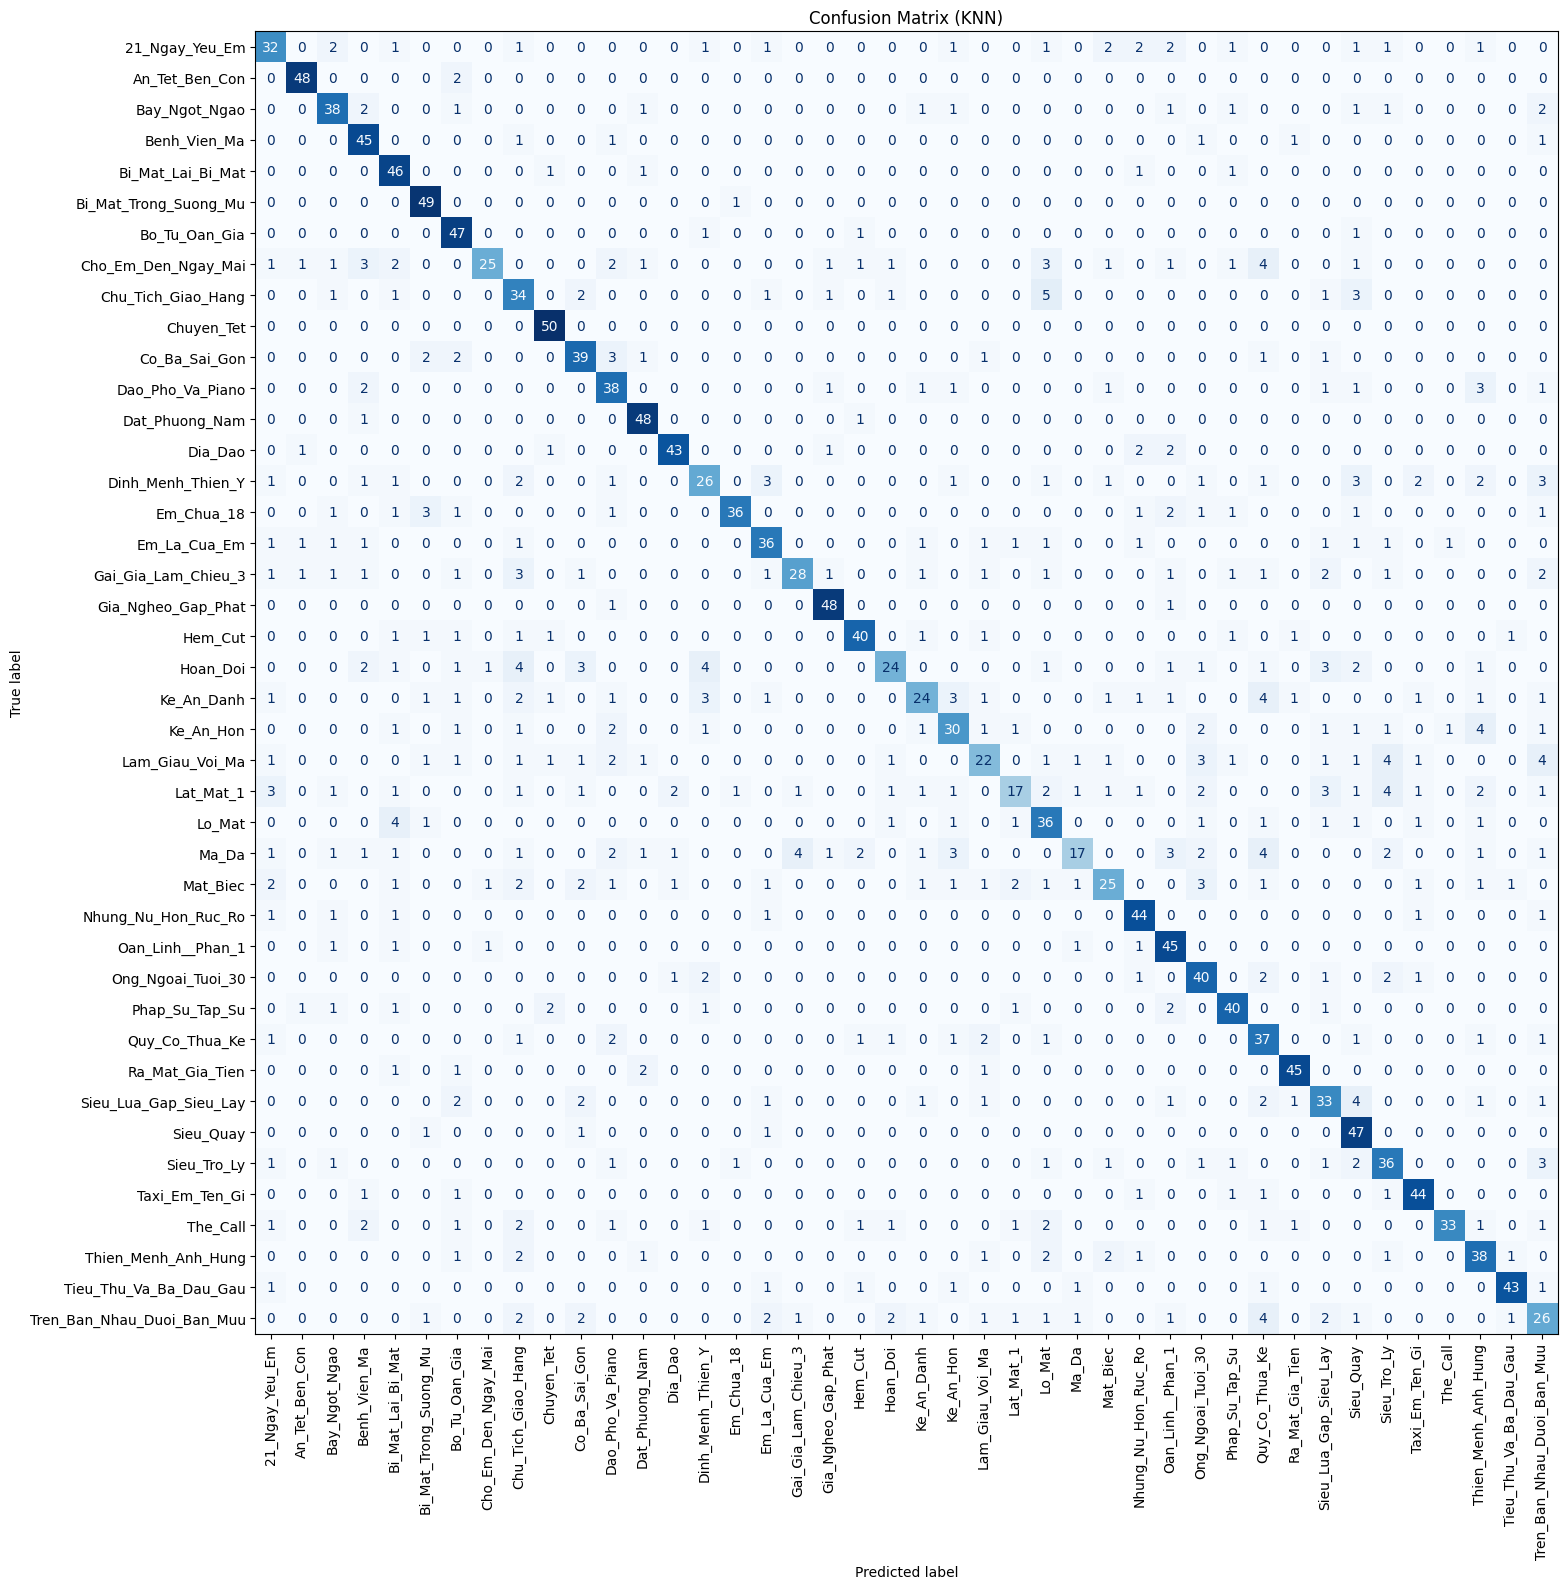


🖼️ Confusion matrix đã được lưu vào 'confusion_matrix_knn.jpg'

📄 Classification Report:
                            precision    recall  f1-score  accuracy
21_Ngay_Yeu_Em               0.653061  0.640000  0.646465  0.734286
An_Tet_Ben_Con               0.905660  0.960000  0.932039  0.734286
Bay_Ngot_Ngao                0.745098  0.760000  0.752475  0.734286
Benh_Vien_Ma                 0.725806  0.900000  0.803571  0.734286
Bi_Mat_Lai_Bi_Mat            0.696970  0.920000  0.793103  0.734286
Bi_Mat_Trong_Suong_Mu        0.816667  0.980000  0.890909  0.734286
Bo_Tu_Oan_Gia                0.723077  0.940000  0.817391  0.734286
Cho_Em_Den_Ngay_Mai          0.892857  0.500000  0.641026  0.734286
Chu_Tich_Giao_Hang           0.548387  0.680000  0.607143  0.734286
Chuyen_Tet                   0.877193  1.000000  0.934579  0.734286
Co_Ba_Sai_Gon                0.722222  0.780000  0.750000  0.734286
Dao_Pho_Va_Piano             0.644068  0.760000  0.697248  0.734286
Dat_Phuong_Nam            

In [38]:
# Cài đặt các tham số
image_size = 128
test_path = "/kaggle/input/frames-film-vietnam-dataset/Frame_Test"
onnx_model_path = "/kaggle/working/knn_model.onnx"
confusion_output_path = "confusion_matrix_knn.jpg"
csv_output_path = "classification_report_knn.csv"
n_per_class = 50 

# ==== Load mô hình và ONNX ====
model = EfficientNetB4(include_top=False, weights='imagenet', pooling='avg', input_shape=(image_size, image_size, 3))

# Kiểm tra đường dẫn mô hình ONNX
if not os.path.exists(onnx_model_path):
    print(f"❌ Không tìm thấy mô hình ONNX tại: {onnx_model_path}")

# Khởi tạo session ONNX với providers rõ ràng
try:
    # Kiểm tra GPU, nếu có sẽ sử dụng CUDA
    providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if 'CUDAExecutionProvider' in ort.get_available_providers() else ['CPUExecutionProvider']
    onnx_session = ort.InferenceSession(onnx_model_path, providers=providers)
    
    # In thông tin đầu vào để kiểm tra
    input_details = onnx_session.get_inputs()[0]
    print(f"✅ Mô hình ONNX đã được tải thành công!")
    # print(f"   - Tên đầu vào: {input_details.name}")
    # print(f"   - Hình dạng đầu vào: {input_details.shape}")
    # print(f"   - Kiểu dữ liệu đầu vào: {input_details.type}")
except Exception as e:
    print(f"❌ Lỗi khi tải mô hình ONNX: {e}")

# ==== Mapping classes ====
classes = {
    1: "21_Ngay_Yeu_Em", 2: "An_Tet_Ben_Con", 3: "Bay_Ngot_Ngao", 4: "Benh_Vien_Ma",
    5: "Bi_Mat_Lai_Bi_Mat", 6: "Bi_Mat_Trong_Suong_Mu", 7: "Bo_Tu_Oan_Gia", 8: "Cho_Em_Den_Ngay_Mai",
    9: "Chu_Tich_Giao_Hang", 10: "Chuyen_Tet", 11: "Co_Ba_Sai_Gon", 12: "Dao_Pho_Va_Piano",
    13: "Dat_Phuong_Nam", 14: "Dia_Dao", 15: "Dinh_Menh_Thien_Y", 16: "Em_Chua_18",
    17: "Em_La_Cua_Em", 18: "Gai_Gia_Lam_Chieu_3", 19: "Gia_Ngheo_Gap_Phat", 20: "Hem_Cut",
    21: "Hoan_Doi", 22: "Ke_An_Danh", 23: "Ke_An_Hon", 24: "Lam_Giau_Voi_Ma",
    25: "Lat_Mat_1", 26: "Lo_Mat", 27: "Ma_Da", 28: "Mat_Biec",
    29: "Nhung_Nu_Hon_Ruc_Ro", 30: "Oan_Linh__Phan_1", 31: "Ong_Ngoai_Tuoi_30",
    32: "Phap_Su_Tap_Su", 33: "Quy_Co_Thua_Ke", 34: "Ra_Mat_Gia_Tien",
    35: "Sieu_Lua_Gap_Sieu_Lay", 36: "Sieu_Quay", 37: "Sieu_Tro_Ly",
    38: "Taxi_Em_Ten_Gi", 39: "The_Call", 40: "Thien_Menh_Anh_Hung",
    41: "Tieu_Thu_Va_Ba_Dau_Gau", 42: "Tren_Ban_Nhau_Duoi_Ban_Muu"
}
class_to_idx = {name: idx for idx, name in classes.items()}
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

# ==== Duyệt tập test và lấy ảnh từ mỗi thư mục ====
y_true = []
y_pred = []
all_images = []

for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Lấy danh sách ảnh trong thư mục này
    image_files = [
        os.path.join(class_dir, f)
        for f in os.listdir(class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    # Lấy ngẫu nhiên n ảnh từ folder (hoặc ít hơn nếu không đủ)
    selected_images = random.sample(image_files, min(n_per_class, len(image_files)))
    all_images.extend(selected_images)

# ==== Dự đoán ====
for img_path in tqdm(all_images, desc="Testing with KNN"):
    try:
        folder_name = os.path.basename(os.path.dirname(img_path))
        if folder_name not in class_to_idx:
            print(f"❌ Folder không hợp lệ: {folder_name}")
            continue

        img = image.load_img(img_path, target_size=(image_size, image_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Trích đặc trưng với ResNet50
        feature = model.predict(x, verbose=0)
        
        if feature.ndim > 2:
            feature = feature.reshape(1, -1)
        
        # Vì chúng ta đảm bảo đầu vào là float32 để tránh lỗi kiểu dữ liệu
        feature = feature.astype(np.float32)

        # Lấy tên đầu vào từ mô hình ONNX để đảm bảo đúng
        input_name = onnx_session.get_inputs()[0].name
        
        # Dự đoán với mô hình ONNX
        outputs = onnx_session.run(None, {input_name: feature})
        
        if outputs[0].ndim == 2:  
            pred_label = np.argmax(outputs[0][0]) + 1 
        else:
            pred_label = outputs[0][0]

        y_true.append(class_to_idx[folder_name])
        y_pred.append(pred_label)
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")
        print(f"  Hình dạng đặc trưng: {feature.shape}, Kiểu dữ liệu: {feature.dtype}")

# print(f"Hình dạng đầu ra: {[output.shape for output in outputs]}")
# print(f"Kiểu đầu ra: {[output.dtype for output in outputs]}")
# print(f"Giá trị đầu ra đầu tiên: {outputs[0][0]}")

# ==== Đánh giá ====
if len(y_true) == 0:
    print("❌ Không có dữ liệu để đánh giá!")
else:
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1) + 1
    accuracy = np.mean(y_true == y_pred)

    print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")
    print(f"✅ Đúng: {np.sum(y_true == y_pred)} / ❌ Sai: {np.sum(y_true != y_pred)}")

    # ==== Confusion Matrix ====
    cm = confusion_matrix(y_true, y_pred)
    class_labels = [classes[i] for i in sorted(classes.keys())]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    fig, ax = plt.subplots(figsize=(16, 16))
    disp.plot(xticks_rotation=90, cmap='Blues', ax=ax, colorbar=False)
    plt.title("Confusion Matrix (KNN)")
    plt.tight_layout()
    plt.savefig(confusion_output_path, dpi=300)
    plt.show()
    print(f"\n🖼️ Confusion matrix đã được lưu vào '{confusion_output_path}'")

    # ==== Classification Report ====
    print("\n📄 Classification Report:")
    report = classification_report(
        y_true, y_pred, target_names=class_labels,
        digits=2, output_dict=True
    )

    # Chuyển báo cáo phân loại thành DataFrame
    report_df = pd.DataFrame(report).transpose()
    if "accuracy" not in report_df.columns:
        report_df["accuracy"] = accuracy
    print(report_df[["precision", "recall", "f1-score", "accuracy"]])

    # Hiển thị các tham số chung cho toàn bộ chương trình
    avg_precision = np.mean(report_df['precision'])
    avg_recall = np.mean(report_df['recall'])
    avg_f1 = np.mean(report_df['f1-score'])

    print("\n📝 Các tham số đánh giá chung:")
    print(f"  - Precision: {avg_precision:.2f}")
    print(f"  - Recall: {avg_recall:.2f}")
    print(f"  - F1-score: {avg_f1:.2f}")
    print(f"  - Accuracy: {accuracy * 100:.2f}%")

    # Lưu báo cáo chi tiết vào tệp CSV
    report_df.to_csv(csv_output_path, index=True)
    print(f"\n📊 Báo cáo phân loại đã được lưu vào '{csv_output_path}'")

    # Lưu các tham số đánh giá chung vào tệp CSV
    evaluation_metrics = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1-score': avg_f1,
        'accuracy': accuracy
    }

    evaluation_df = pd.DataFrame([evaluation_metrics])
    evaluation_df.to_csv('evaluation_metrics_knn.csv', index=False)
    print(f"\n📊 Các tham số đánh giá chung đã được lưu vào 'evaluation_metrics_knn.csv'")

    # Lưu cả báo cáo phân loại và các tham số chung vào một tệp CSV
    final_df = report_df.copy()
    final_df['average_precision'] = avg_precision
    final_df['average_recall'] = avg_recall
    final_df['average_f1-score'] = avg_f1
    final_df['average_accuracy'] = accuracy
    final_df.to_csv('final_classification_report_knn.csv', index=True)
    print(f"\n📊 Báo cáo phân loại cuối cùng đã được lưu vào 'final_classification_report_knn.csv'")


# InceptionV3 + KNN

In [41]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Giả sử biến train_df là tf.data.Dataset đã chuẩn hóa và batch đúng
num_batches = tf.data.experimental.cardinality(train_df).numpy()
strategy = tf.distribute.MirroredStrategy()

# Khởi tạo InceptionV3 trong context của strategy
with strategy.scope():
    base_model_inceptionv3 = InceptionV3(
        include_top=False,
        weights='imagenet',
        pooling='avg',
        input_shape=(image_size, image_size, 3)
    )

# Trích đặc trưng và nhãn
all_features = []
all_labels = []

for images, labels in tqdm(train_df, total=num_batches, desc="Extracting features with InceptionV3"):
    images_pp = preprocess_input(images)
    features_batch = base_model_inceptionv3(images_pp, training=False)
    all_features.append(features_batch.numpy())
    all_labels.append(labels.numpy())

features_array = np.concatenate(all_features, axis=0)   
labels_array = np.concatenate(all_labels, axis=0)

Extracting features with InceptionV3: 100%|██████████| 312/312 [01:28<00:00,  3.51it/s]


In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(features_array, labels_array)

# Chuyển đổi mô hình KNN sang ONNX
onnx_model = convert_sklearn(
    knn, 
    initial_types=[('input', FloatTensorType([None, features_array.shape[1]]))],
    options={id(knn): {'zipmap': False}}  
)

# Lưu mô hình dưới dạng ONNX
with open("knn_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Mô hình KNN đã được lưu dưới dạng ONNX.")

Mô hình KNN đã được lưu dưới dạng ONNX.


✅ Mô hình ONNX đã được tải thành công!


Testing with KNN: 100%|██████████| 2100/2100 [11:10<00:00,  3.13it/s]



✅ Accuracy: 68.00%
✅ Đúng: 1428 / ❌ Sai: 672


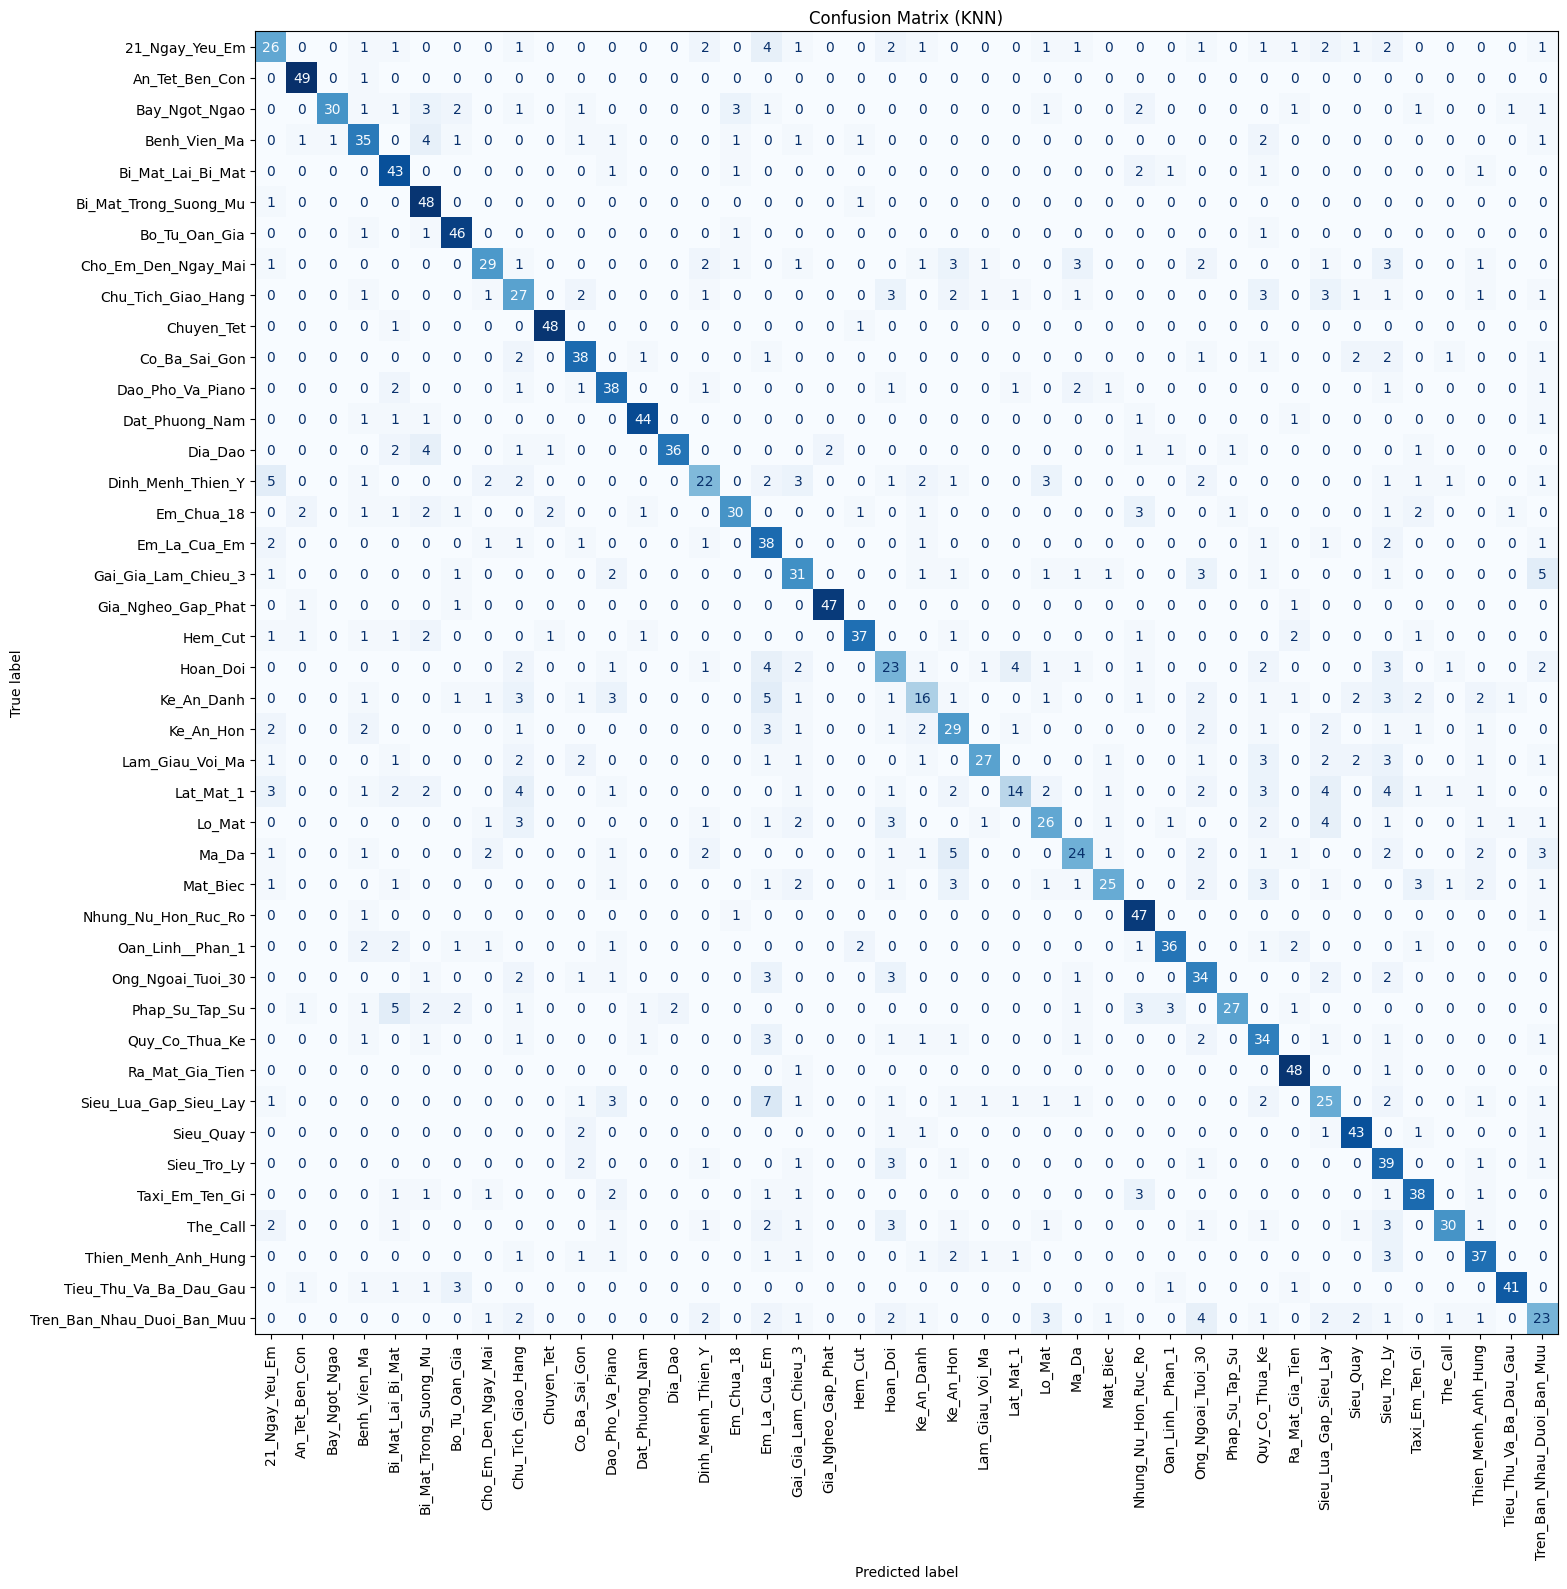


🖼️ Confusion matrix đã được lưu vào 'confusion_matrix_knn.jpg'

📄 Classification Report:
                            precision  recall  f1-score  accuracy
21_Ngay_Yeu_Em               0.541667    0.52  0.530612      0.68
An_Tet_Ben_Con               0.875000    0.98  0.924528      0.68
Bay_Ngot_Ngao                0.967742    0.60  0.740741      0.68
Benh_Vien_Ma                 0.636364    0.70  0.666667      0.68
Bi_Mat_Lai_Bi_Mat            0.641791    0.86  0.735043      0.68
Bi_Mat_Trong_Suong_Mu        0.657534    0.96  0.780488      0.68
Bo_Tu_Oan_Gia                0.779661    0.92  0.844037      0.68
Cho_Em_Den_Ngay_Mai          0.725000    0.58  0.644444      0.68
Chu_Tich_Giao_Hang           0.457627    0.54  0.495413      0.68
Chuyen_Tet                   0.923077    0.96  0.941176      0.68
Co_Ba_Sai_Gon                0.703704    0.76  0.730769      0.68
Dao_Pho_Va_Piano             0.655172    0.76  0.703704      0.68
Dat_Phuong_Nam               0.897959    0.88  0.888

In [43]:
# Cài đặt các tham số
image_size = 128
test_path = "/kaggle/input/frames-film-vietnam-dataset/Frame_Test"
onnx_model_path = "/kaggle/working/knn_model.onnx"
confusion_output_path = "confusion_matrix_knn.jpg"
csv_output_path = "classification_report_knn.csv"
n_per_class = 50 

# ==== Load mô hình và ONNX ====
model = InceptionV3(include_top=False, weights='imagenet', pooling='avg', input_shape=(image_size, image_size, 3))

# Kiểm tra đường dẫn mô hình ONNX
if not os.path.exists(onnx_model_path):
    print(f"❌ Không tìm thấy mô hình ONNX tại: {onnx_model_path}")

# Khởi tạo session ONNX với providers rõ ràng
try:
    # Kiểm tra GPU, nếu có sẽ sử dụng CUDA
    providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if 'CUDAExecutionProvider' in ort.get_available_providers() else ['CPUExecutionProvider']
    onnx_session = ort.InferenceSession(onnx_model_path, providers=providers)
    
    # In thông tin đầu vào để kiểm tra
    input_details = onnx_session.get_inputs()[0]
    print(f"✅ Mô hình ONNX đã được tải thành công!")
    # print(f"   - Tên đầu vào: {input_details.name}")
    # print(f"   - Hình dạng đầu vào: {input_details.shape}")
    # print(f"   - Kiểu dữ liệu đầu vào: {input_details.type}")
except Exception as e:
    print(f"❌ Lỗi khi tải mô hình ONNX: {e}")

# ==== Mapping classes ====
classes = {
    1: "21_Ngay_Yeu_Em", 2: "An_Tet_Ben_Con", 3: "Bay_Ngot_Ngao", 4: "Benh_Vien_Ma",
    5: "Bi_Mat_Lai_Bi_Mat", 6: "Bi_Mat_Trong_Suong_Mu", 7: "Bo_Tu_Oan_Gia", 8: "Cho_Em_Den_Ngay_Mai",
    9: "Chu_Tich_Giao_Hang", 10: "Chuyen_Tet", 11: "Co_Ba_Sai_Gon", 12: "Dao_Pho_Va_Piano",
    13: "Dat_Phuong_Nam", 14: "Dia_Dao", 15: "Dinh_Menh_Thien_Y", 16: "Em_Chua_18",
    17: "Em_La_Cua_Em", 18: "Gai_Gia_Lam_Chieu_3", 19: "Gia_Ngheo_Gap_Phat", 20: "Hem_Cut",
    21: "Hoan_Doi", 22: "Ke_An_Danh", 23: "Ke_An_Hon", 24: "Lam_Giau_Voi_Ma",
    25: "Lat_Mat_1", 26: "Lo_Mat", 27: "Ma_Da", 28: "Mat_Biec",
    29: "Nhung_Nu_Hon_Ruc_Ro", 30: "Oan_Linh__Phan_1", 31: "Ong_Ngoai_Tuoi_30",
    32: "Phap_Su_Tap_Su", 33: "Quy_Co_Thua_Ke", 34: "Ra_Mat_Gia_Tien",
    35: "Sieu_Lua_Gap_Sieu_Lay", 36: "Sieu_Quay", 37: "Sieu_Tro_Ly",
    38: "Taxi_Em_Ten_Gi", 39: "The_Call", 40: "Thien_Menh_Anh_Hung",
    41: "Tieu_Thu_Va_Ba_Dau_Gau", 42: "Tren_Ban_Nhau_Duoi_Ban_Muu"
}
class_to_idx = {name: idx for idx, name in classes.items()}
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

# ==== Duyệt tập test và lấy ảnh từ mỗi thư mục ====
y_true = []
y_pred = []
all_images = []

for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Lấy danh sách ảnh trong thư mục này
    image_files = [
        os.path.join(class_dir, f)
        for f in os.listdir(class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    # Lấy ngẫu nhiên n ảnh từ folder (hoặc ít hơn nếu không đủ)
    selected_images = random.sample(image_files, min(n_per_class, len(image_files)))
    all_images.extend(selected_images)

# ==== Dự đoán ====
for img_path in tqdm(all_images, desc="Testing with KNN"):
    try:
        folder_name = os.path.basename(os.path.dirname(img_path))
        if folder_name not in class_to_idx:
            print(f"❌ Folder không hợp lệ: {folder_name}")
            continue

        img = image.load_img(img_path, target_size=(image_size, image_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Trích đặc trưng với ResNet50
        feature = model.predict(x, verbose=0)
        
        if feature.ndim > 2:
            feature = feature.reshape(1, -1)
        
        # Vì chúng ta đảm bảo đầu vào là float32 để tránh lỗi kiểu dữ liệu
        feature = feature.astype(np.float32)

        # Lấy tên đầu vào từ mô hình ONNX để đảm bảo đúng
        input_name = onnx_session.get_inputs()[0].name
        
        # Dự đoán với mô hình ONNX
        outputs = onnx_session.run(None, {input_name: feature})
        
        if outputs[0].ndim == 2:  
            pred_label = np.argmax(outputs[0][0]) + 1 
        else:
            pred_label = outputs[0][0]

        y_true.append(class_to_idx[folder_name])
        y_pred.append(pred_label)
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")
        print(f"  Hình dạng đặc trưng: {feature.shape}, Kiểu dữ liệu: {feature.dtype}")

# print(f"Hình dạng đầu ra: {[output.shape for output in outputs]}")
# print(f"Kiểu đầu ra: {[output.dtype for output in outputs]}")
# print(f"Giá trị đầu ra đầu tiên: {outputs[0][0]}")

# ==== Đánh giá ====
if len(y_true) == 0:
    print("❌ Không có dữ liệu để đánh giá!")
else:
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1) + 1
    accuracy = np.mean(y_true == y_pred)

    print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")
    print(f"✅ Đúng: {np.sum(y_true == y_pred)} / ❌ Sai: {np.sum(y_true != y_pred)}")

    # ==== Confusion Matrix ====
    cm = confusion_matrix(y_true, y_pred)
    class_labels = [classes[i] for i in sorted(classes.keys())]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    fig, ax = plt.subplots(figsize=(16, 16))
    disp.plot(xticks_rotation=90, cmap='Blues', ax=ax, colorbar=False)
    plt.title("Confusion Matrix (KNN)")
    plt.tight_layout()
    plt.savefig(confusion_output_path, dpi=300)
    plt.show()
    print(f"\n🖼️ Confusion matrix đã được lưu vào '{confusion_output_path}'")

    # ==== Classification Report ====
    print("\n📄 Classification Report:")
    report = classification_report(
        y_true, y_pred, target_names=class_labels,
        digits=2, output_dict=True
    )

    # Chuyển báo cáo phân loại thành DataFrame
    report_df = pd.DataFrame(report).transpose()
    if "accuracy" not in report_df.columns:
        report_df["accuracy"] = accuracy
    print(report_df[["precision", "recall", "f1-score", "accuracy"]])

    # Hiển thị các tham số chung cho toàn bộ chương trình
    avg_precision = np.mean(report_df['precision'])
    avg_recall = np.mean(report_df['recall'])
    avg_f1 = np.mean(report_df['f1-score'])

    print("\n📝 Các tham số đánh giá chung:")
    print(f"  - Precision: {avg_precision:.2f}")
    print(f"  - Recall: {avg_recall:.2f}")
    print(f"  - F1-score: {avg_f1:.2f}")
    print(f"  - Accuracy: {accuracy * 100:.2f}%")

    # Lưu báo cáo chi tiết vào tệp CSV
    report_df.to_csv(csv_output_path, index=True)
    print(f"\n📊 Báo cáo phân loại đã được lưu vào '{csv_output_path}'")

    # Lưu các tham số đánh giá chung vào tệp CSV
    evaluation_metrics = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1-score': avg_f1,
        'accuracy': accuracy
    }

    evaluation_df = pd.DataFrame([evaluation_metrics])
    evaluation_df.to_csv('evaluation_metrics_knn.csv', index=False)
    print(f"\n📊 Các tham số đánh giá chung đã được lưu vào 'evaluation_metrics_knn.csv'")

    # Lưu cả báo cáo phân loại và các tham số chung vào một tệp CSV
    final_df = report_df.copy()
    final_df['average_precision'] = avg_precision
    final_df['average_recall'] = avg_recall
    final_df['average_f1-score'] = avg_f1
    final_df['average_accuracy'] = accuracy
    final_df.to_csv('final_classification_report_knn.csv', index=True)
    print(f"\n📊 Báo cáo phân loại cuối cùng đã được lưu vào 'final_classification_report_knn.csv'")


# VGG16 + KNN

In [47]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Số batch
num_batches = tf.data.experimental.cardinality(train_df).numpy()

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    base_model_vgg16 = VGG16(
        include_top=False,
        weights='imagenet',
        pooling='avg',
        input_shape=(image_size, image_size, 3)
    )

# Nơi lưu đặc trưng và nhãn
all_features = []
all_labels = []

for images, labels in tqdm(train_df, total=num_batches, desc="Extracting features"):
    images_pp = preprocess_input(images)
    features_batch = base_model_vgg16(images_pp, training=False)
    all_features.append(features_batch.numpy())
    all_labels.append(labels.numpy())

# Nối đặc trưng và nhãn
features_array = np.concatenate(all_features, axis=0)
labels_array = np.concatenate(all_labels, axis=0)

Extracting features: 100%|██████████| 312/312 [00:35<00:00,  8.87it/s]


In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(features_array, labels_array)

# Chuyển đổi mô hình KNN sang ONNX
onnx_model = convert_sklearn(
    knn, 
    initial_types=[('input', FloatTensorType([None, features_array.shape[1]]))],
    options={id(knn): {'zipmap': False}}  
)

# Lưu mô hình dưới dạng ONNX
with open("knn_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Mô hình KNN đã được lưu dưới dạng ONNX.")

Mô hình KNN đã được lưu dưới dạng ONNX.


✅ Mô hình ONNX đã được tải thành công!


Testing with KNN: 100%|██████████| 2100/2100 [06:51<00:00,  5.10it/s]



✅ Accuracy: 80.10%
✅ Đúng: 1682 / ❌ Sai: 418


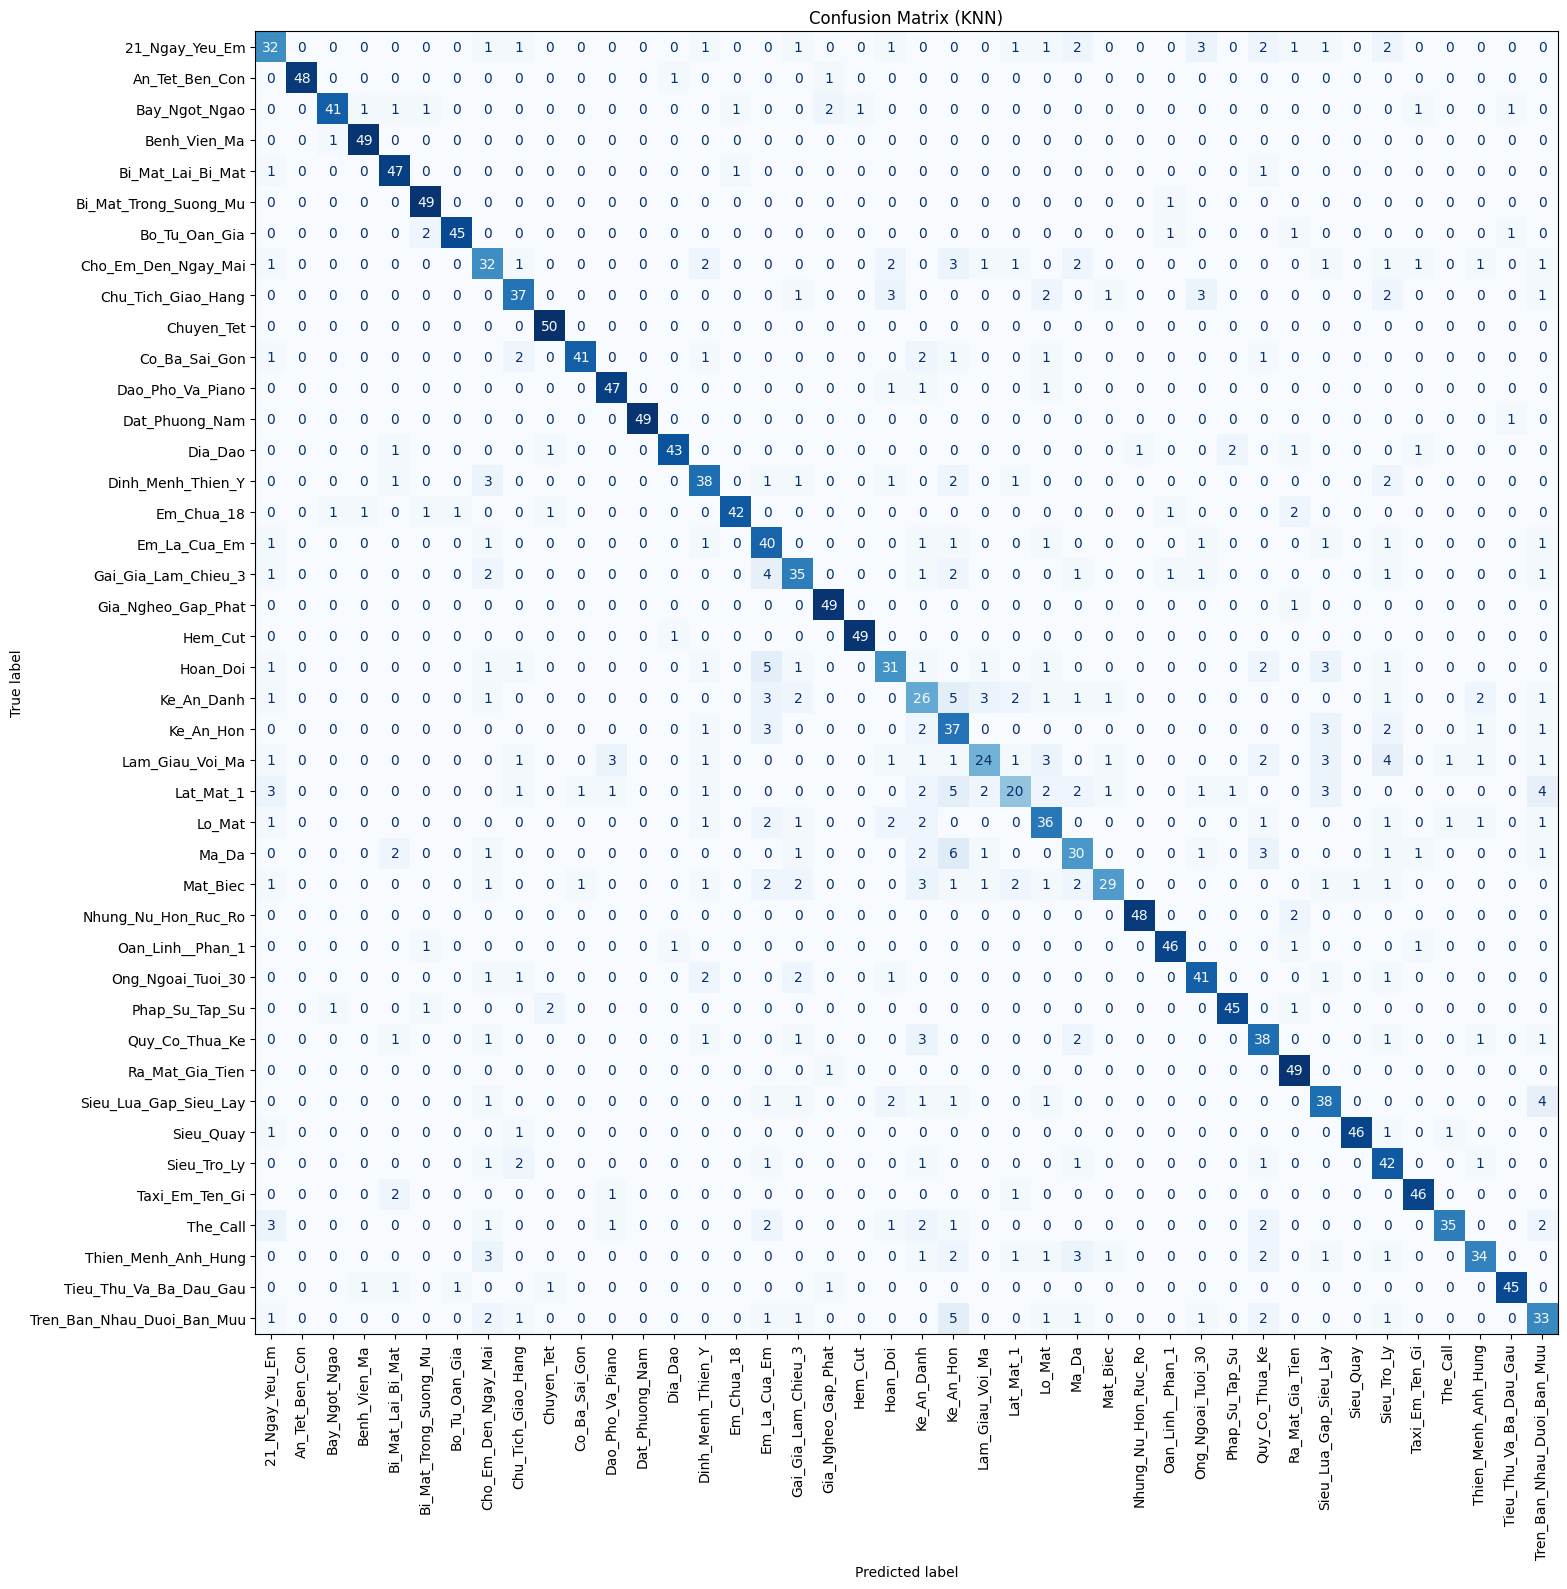


🖼️ Confusion matrix đã được lưu vào 'confusion_matrix_knn.jpg'

📄 Classification Report:
                            precision    recall  f1-score  accuracy
21_Ngay_Yeu_Em               0.640000  0.640000  0.640000  0.800952
An_Tet_Ben_Con               1.000000  0.960000  0.979592  0.800952
Bay_Ngot_Ngao                0.931818  0.820000  0.872340  0.800952
Benh_Vien_Ma                 0.942308  0.980000  0.960784  0.800952
Bi_Mat_Lai_Bi_Mat            0.839286  0.940000  0.886792  0.800952
Bi_Mat_Trong_Suong_Mu        0.890909  0.980000  0.933333  0.800952
Bo_Tu_Oan_Gia                0.957447  0.900000  0.927835  0.800952
Cho_Em_Den_Ngay_Mai          0.603774  0.640000  0.621359  0.800952
Chu_Tich_Giao_Hang           0.755102  0.740000  0.747475  0.800952
Chuyen_Tet                   0.909091  1.000000  0.952381  0.800952
Co_Ba_Sai_Gon                0.953488  0.820000  0.881720  0.800952
Dao_Pho_Va_Piano             0.886792  0.940000  0.912621  0.800952
Dat_Phuong_Nam            

In [49]:
# Cài đặt các tham số
image_size = 128
test_path = "/kaggle/input/frames-film-vietnam-dataset/Frame_Test"
onnx_model_path = "/kaggle/working/knn_model.onnx"
confusion_output_path = "confusion_matrix_knn.jpg"
csv_output_path = "classification_report_knn.csv"
n_per_class = 50 

# ==== Load mô hình và ONNX ====
model = VGG16(include_top=False, weights='imagenet', pooling='avg', input_shape=(image_size, image_size, 3))

# Kiểm tra đường dẫn mô hình ONNX
if not os.path.exists(onnx_model_path):
    print(f"❌ Không tìm thấy mô hình ONNX tại: {onnx_model_path}")

# Khởi tạo session ONNX với providers rõ ràng
try:
    # Kiểm tra GPU, nếu có sẽ sử dụng CUDA
    providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if 'CUDAExecutionProvider' in ort.get_available_providers() else ['CPUExecutionProvider']
    onnx_session = ort.InferenceSession(onnx_model_path, providers=providers)
    
    # In thông tin đầu vào để kiểm tra
    input_details = onnx_session.get_inputs()[0]
    print(f"✅ Mô hình ONNX đã được tải thành công!")
    # print(f"   - Tên đầu vào: {input_details.name}")
    # print(f"   - Hình dạng đầu vào: {input_details.shape}")
    # print(f"   - Kiểu dữ liệu đầu vào: {input_details.type}")
except Exception as e:
    print(f"❌ Lỗi khi tải mô hình ONNX: {e}")

# ==== Mapping classes ====
classes = {
    1: "21_Ngay_Yeu_Em", 2: "An_Tet_Ben_Con", 3: "Bay_Ngot_Ngao", 4: "Benh_Vien_Ma",
    5: "Bi_Mat_Lai_Bi_Mat", 6: "Bi_Mat_Trong_Suong_Mu", 7: "Bo_Tu_Oan_Gia", 8: "Cho_Em_Den_Ngay_Mai",
    9: "Chu_Tich_Giao_Hang", 10: "Chuyen_Tet", 11: "Co_Ba_Sai_Gon", 12: "Dao_Pho_Va_Piano",
    13: "Dat_Phuong_Nam", 14: "Dia_Dao", 15: "Dinh_Menh_Thien_Y", 16: "Em_Chua_18",
    17: "Em_La_Cua_Em", 18: "Gai_Gia_Lam_Chieu_3", 19: "Gia_Ngheo_Gap_Phat", 20: "Hem_Cut",
    21: "Hoan_Doi", 22: "Ke_An_Danh", 23: "Ke_An_Hon", 24: "Lam_Giau_Voi_Ma",
    25: "Lat_Mat_1", 26: "Lo_Mat", 27: "Ma_Da", 28: "Mat_Biec",
    29: "Nhung_Nu_Hon_Ruc_Ro", 30: "Oan_Linh__Phan_1", 31: "Ong_Ngoai_Tuoi_30",
    32: "Phap_Su_Tap_Su", 33: "Quy_Co_Thua_Ke", 34: "Ra_Mat_Gia_Tien",
    35: "Sieu_Lua_Gap_Sieu_Lay", 36: "Sieu_Quay", 37: "Sieu_Tro_Ly",
    38: "Taxi_Em_Ten_Gi", 39: "The_Call", 40: "Thien_Menh_Anh_Hung",
    41: "Tieu_Thu_Va_Ba_Dau_Gau", 42: "Tren_Ban_Nhau_Duoi_Ban_Muu"
}
class_to_idx = {name: idx for idx, name in classes.items()}
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

# ==== Duyệt tập test và lấy ảnh từ mỗi thư mục ====
y_true = []
y_pred = []
all_images = []

for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Lấy danh sách ảnh trong thư mục này
    image_files = [
        os.path.join(class_dir, f)
        for f in os.listdir(class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    # Lấy ngẫu nhiên n ảnh từ folder (hoặc ít hơn nếu không đủ)
    selected_images = random.sample(image_files, min(n_per_class, len(image_files)))
    all_images.extend(selected_images)

# ==== Dự đoán ====
for img_path in tqdm(all_images, desc="Testing with KNN"):
    try:
        folder_name = os.path.basename(os.path.dirname(img_path))
        if folder_name not in class_to_idx:
            print(f"❌ Folder không hợp lệ: {folder_name}")
            continue

        img = image.load_img(img_path, target_size=(image_size, image_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Trích đặc trưng với ResNet50
        feature = model.predict(x, verbose=0)
        
        if feature.ndim > 2:
            feature = feature.reshape(1, -1)
        
        # Vì chúng ta đảm bảo đầu vào là float32 để tránh lỗi kiểu dữ liệu
        feature = feature.astype(np.float32)

        # Lấy tên đầu vào từ mô hình ONNX để đảm bảo đúng
        input_name = onnx_session.get_inputs()[0].name
        
        # Dự đoán với mô hình ONNX
        outputs = onnx_session.run(None, {input_name: feature})
        
        if outputs[0].ndim == 2:  
            pred_label = np.argmax(outputs[0][0]) + 1 
        else:
            pred_label = outputs[0][0]

        y_true.append(class_to_idx[folder_name])
        y_pred.append(pred_label)
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")
        print(f"  Hình dạng đặc trưng: {feature.shape}, Kiểu dữ liệu: {feature.dtype}")

# print(f"Hình dạng đầu ra: {[output.shape for output in outputs]}")
# print(f"Kiểu đầu ra: {[output.dtype for output in outputs]}")
# print(f"Giá trị đầu ra đầu tiên: {outputs[0][0]}")

# ==== Đánh giá ====
if len(y_true) == 0:
    print("❌ Không có dữ liệu để đánh giá!")
else:
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1) + 1
    accuracy = np.mean(y_true == y_pred)

    print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")
    print(f"✅ Đúng: {np.sum(y_true == y_pred)} / ❌ Sai: {np.sum(y_true != y_pred)}")

    # ==== Confusion Matrix ====
    cm = confusion_matrix(y_true, y_pred)
    class_labels = [classes[i] for i in sorted(classes.keys())]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    fig, ax = plt.subplots(figsize=(16, 16))
    disp.plot(xticks_rotation=90, cmap='Blues', ax=ax, colorbar=False)
    plt.title("Confusion Matrix (KNN)")
    plt.tight_layout()
    plt.savefig(confusion_output_path, dpi=300)
    plt.show()
    print(f"\n🖼️ Confusion matrix đã được lưu vào '{confusion_output_path}'")

    # ==== Classification Report ====
    print("\n📄 Classification Report:")
    report = classification_report(
        y_true, y_pred, target_names=class_labels,
        digits=2, output_dict=True
    )

    # Chuyển báo cáo phân loại thành DataFrame
    report_df = pd.DataFrame(report).transpose()
    if "accuracy" not in report_df.columns:
        report_df["accuracy"] = accuracy
    print(report_df[["precision", "recall", "f1-score", "accuracy"]])

    # Hiển thị các tham số chung cho toàn bộ chương trình
    avg_precision = np.mean(report_df['precision'])
    avg_recall = np.mean(report_df['recall'])
    avg_f1 = np.mean(report_df['f1-score'])

    print("\n📝 Các tham số đánh giá chung:")
    print(f"  - Precision: {avg_precision:.2f}")
    print(f"  - Recall: {avg_recall:.2f}")
    print(f"  - F1-score: {avg_f1:.2f}")
    print(f"  - Accuracy: {accuracy * 100:.2f}%")

    # Lưu báo cáo chi tiết vào tệp CSV
    report_df.to_csv(csv_output_path, index=True)
    print(f"\n📊 Báo cáo phân loại đã được lưu vào '{csv_output_path}'")

    # Lưu các tham số đánh giá chung vào tệp CSV
    evaluation_metrics = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1-score': avg_f1,
        'accuracy': accuracy
    }

    evaluation_df = pd.DataFrame([evaluation_metrics])
    evaluation_df.to_csv('evaluation_metrics_knn.csv', index=False)
    print(f"\n📊 Các tham số đánh giá chung đã được lưu vào 'evaluation_metrics_knn.csv'")

    # Lưu cả báo cáo phân loại và các tham số chung vào một tệp CSV
    final_df = report_df.copy()
    final_df['average_precision'] = avg_precision
    final_df['average_recall'] = avg_recall
    final_df['average_f1-score'] = avg_f1
    final_df['average_accuracy'] = accuracy
    final_df.to_csv('final_classification_report_knn.csv', index=True)
    print(f"\n📊 Báo cáo phân loại cuối cùng đã được lưu vào 'final_classification_report_knn.csv'")


# Resnet50 + FAISS Index

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Số batch
num_batches = tf.data.experimental.cardinality(train_df).numpy()

strategy = tf.distribute.MirroredStrategy()

# Khởi tạo model trong context của strategy
with strategy.scope():
    base_model_resnet50 = ResNet50(
        include_top=False,
        weights='imagenet',
        pooling='avg',
        input_shape=(image_size, image_size, 3)
    )

# Nơi lưu đặc trưng và nhãn
all_features = []
all_labels = []

# Lặp qua từng batch
for images, labels in tqdm(train_df, total=num_batches, desc="Extracting features"):
    images_pp = preprocess_input(images)
    features_batch = base_model_resnet50(images_pp, training=False)
    all_features.append(features_batch.numpy())
    all_labels.append(labels.numpy())

# Đánh nhãn ứng với đặc trưng
features_array = np.concatenate(all_features, axis=0)
labels_array = np.concatenate(all_labels, axis=0)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extracting features: 100%|██████████| 401/401 [01:35<00:00,  4.22it/s]


In [11]:
import faiss
import numpy as np

# Chuẩn hóa L2 cho mỗi vector (độ dài = 1)
def l2_normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / (norms + 1e-10)  # thêm epsilon để tránh chia cho 0

# Chuẩn hóa vector đặc trưng
normalized_features = l2_normalize(features_array.astype('float32'))

# Kích thước vector đặc trưng
d = normalized_features.shape[1]

# Khởi tạo index FAISS sử dụng khoảng cách Euclidean
index = faiss.IndexFlatL2(d)

# Thêm vector đã chuẩn hóa vào index
index.add(normalized_features)
print("Đã thêm", index.ntotal, "vector đã chuẩn hóa vào FAISS index.")

# Lưu index và nhãn
faiss.write_index(index, "faiss_features.index")
np.save("faiss_labels.npy", labels_array)

Đã thêm 51210 vector đã chuẩn hóa vào FAISS index.


In [12]:
# Đọc lại FAISS index và nhãn
index = faiss.read_index("faiss_features.index")
labels_array = np.load("faiss_labels.npy")

In [ ]:
# Cài đặt các tham số
image_size = 128
test_path = "/kaggle/input/movies-dataset-1/Process_Frames_1/Test"
index_path = "faiss_features.index" 
label_path = "faiss_labels.npy"      
confusion_output_path = "confusion_matrix_faiss.jpg"
csv_output_path = "classification_report_faiss.csv"
similarity_threshold = 0.8  

# ==== Load mô hình và FAISS index ====
# Load mô hình ResNet50 
model = ResNet50(include_top=False, weights='imagenet', pooling='avg', input_shape=(image_size, image_size, 3))

# Kiểm tra đường dẫn FAISS index và labels
if not os.path.exists(index_path):
    print(f"❌ Không tìm thấy FAISS index tại: {index_path}")
if not os.path.exists(label_path):
    print(f"❌ Không tìm thấy nhãn tại: {label_path}")

# Load FAISS index và labels
try:
    # Load index trực tiếp cho CPU
    index = faiss.read_index(index_path)

    # Load labels
    index_labels = np.load(label_path)

    print(f"✅ FAISS index đã được tải thành công!")
    print(f"   - Số lượng vectors: {index.ntotal}")
    print(f"   - Kích thước vector: {index.d}")
except Exception as e:
    print(f"❌ Lỗi khi tải FAISS index: {e}")

# ==== Mapping classes ====
classes = {
    1: "21_Ngay_Yeu_Em", 2: "4_Nam_2_Chang_1_Tinh_Yeu", 3: "An_Tet_Ben_Con", 4: "Bay_Ngot_Ngao", 5: "Benh_Vien_Ma",
    6: "Bi_Mat_Lai_Bi_Mat", 7: "Bi_Mat_Trong_Suong_Mu", 8: "Bo_Tu_Oan_Gia", 9: "Cho_Em_Den_Ngay_Mai", 10: "Chu_Tich_Giao_Hang",
    11: "Chuyen_Tet", 12: "Co_Ba_Sai_Gon", 13: "Dao_Pho_Va_Piano", 14: "Dat_Rung_Phuong_Nam", 15: "Dia_Dao",
    16: "Dinh_Menh_Thien_Y", 17: "Doi_Mat_Am_Duong", 18: "Em_Chua_18", 19: "Em_La_Cua_Em", 20: "Gai_Gia_Lam_Chieu_3",
    21: "Gia_Ngheo_Gap_Phat", 22: "Hem_Cut", 23: "Hoan_Doi", 24: "Ke_An_Danh", 25: "Ke_An_Hon",
    26: "Lam_Giau_Voi_Ma", 27: "Lat_Mat_1", 28: "Linh_Mieu_Quy_Nhap_Trang", 29: "Lo_Mat", 30: "Ma_Da",
    31: "Mat_Biec", 32: "Nghe_Sieu_De", 33: "Nhung_Nu_Hon_Ruc_Ro", 34: "Ong_Ngoai_Tuoi_30", 35: "Phap_Su_Tap_Su",
    36: "Quy_Co_Thua_Ke", 37: "Ra_Mat_Gia_Tien", 38: "Sieu_Lua_Gap_Sieu_Lay", 39: "Sieu_Tro_Ly", 40: "Tam_Cam_Chuyen_Chua_Ke",
    41: "Taxi_Em_Ten_Gi", 42: "The_Call", 43: "Thien_Menh_Anh_Hung", 44: "Tieu_Thu_Va_Ba_Dau_Gau", 45: "Tren_Ban_Nhau_Duoi_Ban_Muu",
    46: "Khac"
}
class_to_idx = {name: idx for idx, name in classes.items()}
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

# ==== Duyệt tập test và lấy tất cả ảnh từ mỗi thư mục ====
y_true = []
y_pred = []
all_images = []
for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if not os.path.isdir(class_dir):
        continue
    # Lấy danh sách tất cả ảnh trong thư mục này
    image_files = [
        os.path.join(class_dir, f)
        for f in os.listdir(class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]
    all_images.extend(image_files)

# ==== Dự đoán ====
processing_times = []  # Danh sách lưu thời gian xử lý từng ảnh
for img_path in tqdm(all_images, desc="Testing with FAISS"):
    try:
        start_time = time.time()  # Bắt đầu đo thời gian
        
        folder_name = os.path.basename(os.path.dirname(img_path))
        if folder_name not in class_to_idx:
            print(f"❌ Folder không hợp lệ: {folder_name}")
            continue
        img = image.load_img(img_path, target_size=(image_size, image_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Trích đặc trưng với mô hình
        feature = model.predict(x, verbose=0)
        
        # Chuẩn hóa L2 đặc trưng mẫu truy vấn để phù hợp với vector đã chuẩn hóa trong index
        feature = feature / (np.linalg.norm(feature) + 1e-10)  # Thêm epsilon để tránh chia cho 0
        
        # Đảm bảo đặc trưng có định dạng phù hợp sau khi chuẩn hóa
        feature = feature.astype(np.float32)
        
        # Tìm kiếm k=1 điểm gần nhất trong FAISS index
        D, I = index.search(feature, 1)
        
        # Kiểm tra similarity score từ khoảng cách L2 với vector đã chuẩn hóa
        # Với vector đã chuẩn hóa L2, khoảng cách Euclidean bình phương (D) và cosine similarity có quan hệ:
        # cosine_similarity = 1 - D/2
        # Khoảng cách FAISS là bình phương khoảng cách Euclidean
        euclidean_dist_squared = D[0][0]
        similarity_score = 1 - euclidean_dist_squared/2  # Chuyển đổi khoảng cách thành cosine similarity
        
        # Nếu similarity dưới ngưỡng, gán nhãn "Khác" (43)
        if similarity_score < similarity_threshold:
            pred_label = 46  # Nhãn "Khác"
        else:
            # Lấy nhãn dự đoán từ FAISS
            pred_label_data = index_labels[I[0][0]]
            if isinstance(pred_label_data, (np.ndarray, list)) and len(pred_label_data) > 1:
                pred_label = int(np.argmax(pred_label_data)) + 1
            else:
                pred_label = int(pred_label_data)

        # Lưu kết quả dự đoán và nhãn thực tế
        y_true.append(class_to_idx[folder_name])
        y_pred.append(pred_label)
        
        # Kết thúc đo thời gian và lưu lại
        end_time = time.time()
        processing_time = end_time - start_time
        processing_times.append(processing_time)
        
        # In thông tin cho debug (có thể bỏ comment nếu cần kiểm tra)
        # print(f"Ảnh: {img_path}, Similarity: {similarity_score:.4f}, Nhãn dự đoán: {pred_label} ({idx_to_class[pred_label]})")
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")
        print(f"  Hình dạng đặc trưng: {feature.shape}, Kiểu dữ liệu: {feature.dtype}")

# ==== Đánh giá ====
if len(y_true) == 0:
    print("❌ Không có dữ liệu để đánh giá!")
else:
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    accuracy = np.mean(y_true == y_pred)
    print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")
    print(f"✅ Đúng: {np.sum(y_true == y_pred)} / ❌ Sai: {np.sum(y_true != y_pred)}")
    
    # Tính thời gian xử lý trung bình cho một ảnh
    avg_processing_time = np.mean(processing_times)
    print(f"\n⏱️ Thời gian xử lý trung bình: {avg_processing_time:.4f} giây/ảnh")
    print(f"⏱️ Tổng thời gian xử lý: {sum(processing_times):.2f} giây cho {len(processing_times)} ảnh")
    
    # ==== Confusion Matrix ====
    cm = confusion_matrix(y_true, y_pred)
    class_labels = [classes[i] for i in sorted(classes.keys())]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    fig, ax = plt.subplots(figsize=(16, 16))
    disp.plot(xticks_rotation=90, cmap='Blues', ax=ax, colorbar=False)
    plt.title("Confusion Matrix (FAISS)")
    plt.tight_layout()
    plt.savefig(confusion_output_path, dpi=300)
    plt.show()
    print(f"\n🖼️ Confusion matrix đã được lưu vào '{confusion_output_path}'")
    
    # ==== Classification Report ====
    print("\n📄 Classification Report:")
    report = classification_report(
        y_true, y_pred, target_names=class_labels,
        digits=2, output_dict=True
    )
    # Chuyển báo cáo phân loại thành DataFrame
    report_df = pd.DataFrame(report).transpose()
    if "accuracy" not in report_df.columns:
        report_df["accuracy"] = accuracy
    print(report_df[["precision", "recall", "f1-score", "accuracy"]])
    
    # Hiển thị các tham số chung cho toàn bộ chương trình
    avg_precision = np.mean(report_df['precision'])
    avg_recall = np.mean(report_df['recall'])
    avg_f1 = np.mean(report_df['f1-score'])
    avg_processing_time = np.mean(processing_times)
    
    print("\n📝 Các tham số đánh giá chung:")
    print(f"  - Precision: {avg_precision:.2f}")
    print(f"  - Recall: {avg_recall:.2f}")
    print(f"  - F1-score: {avg_f1:.2f}")
    print(f"  - Accuracy: {accuracy * 100:.2f}%")
    print(f"  - Thời gian xử lý trung bình: {avg_processing_time:.4f} giây/ảnh")
    
    # Lưu báo cáo chi tiết vào tệp CSV
    report_df.to_csv(csv_output_path, index=True)
    print(f"\n📊 Báo cáo phân loại đã được lưu vào '{csv_output_path}'")
    
    # Lưu các tham số đánh giá chung vào tệp CSV
    evaluation_metrics = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1-score': avg_f1,
        'accuracy': accuracy,
        'avg_processing_time': avg_processing_time
    }
    evaluation_df = pd.DataFrame([evaluation_metrics])
    evaluation_df.to_csv('evaluation_metrics_faiss.csv', index=False)
    print(f"\n📊 Các tham số đánh giá chung đã được lưu vào 'evaluation_metrics_faiss.csv'")
    
    # Lưu cả báo cáo phân loại và các tham số chung vào một tệp CSV
    final_df = report_df.copy()
    final_df['average_precision'] = avg_precision
    final_df['average_recall'] = avg_recall
    final_df['average_f1-score'] = avg_f1
    final_df['average_accuracy'] = accuracy
    final_df['avg_processing_time'] = avg_processing_time
    final_df.to_csv('final_classification_report_faiss.csv', index=True)
    print(f"\n📊 Báo cáo phân loại cuối cùng đã được lưu vào 'final_classification_report_faiss.csv'")

✅ FAISS index đã được tải thành công!
   - Số lượng vectors: 51210
   - Kích thước vector: 2048


Testing with FAISS:   0%|          | 0/16864 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1748174460.387668     110 service.cc:148] XLA service 0x7fb4e0003ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748174460.388525     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748174462.496178     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Testing with FAISS:  40%|████      | 6757/16864 [11:59<17:58,  9.38it/s]

# EfficientNetB4 + FAISS Index

In [16]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.efficientnet import preprocess_input

# Số batch
num_batches = tf.data.experimental.cardinality(train_df).numpy()

strategy = tf.distribute.MirroredStrategy()

# Khởi tạo EfficientNetB4 trong context của strategy
with strategy.scope():
    base_model_efficientnetb4 = EfficientNetB4(
        include_top=False,
        weights='imagenet',
        pooling='avg',
        input_shape=(image_size, image_size, 3)
    )

# Nơi lưu đặc trưng và nhãn
all_features = []
all_labels = []

# Lặp qua từng batch
for images, labels in tqdm(train_df, total=num_batches, desc="Extracting features with EfficientNetB4"):
    images_pp = preprocess_input(images)
    features_batch = base_model_efficientnetb4(images_pp, training=False)
    all_features.append(features_batch.numpy())
    all_labels.append(labels.numpy())

# Kết hợp đặc trưng và nhãn
features_array = np.concatenate(all_features, axis=0)
labels_array = np.concatenate(all_labels, axis=0)

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Extracting features with EfficientNetB4: 100%|██████████| 295/295 [02:30<00:00,  1.96it/s]


In [17]:
import faiss
import numpy as np

# Chuẩn hóa L2 cho mỗi vector (độ dài = 1)
def l2_normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / (norms + 1e-10)  # thêm epsilon để tránh chia cho 0

# Chuẩn hóa vector đặc trưng
normalized_features = l2_normalize(features_array.astype('float32'))

# Kích thước vector đặc trưng
d = normalized_features.shape[1]

# Khởi tạo index FAISS sử dụng khoảng cách Euclidean
index = faiss.IndexFlatL2(d)

# Thêm vector đã chuẩn hóa vào index
index.add(normalized_features)
print("Đã thêm", index.ntotal, "vector đã chuẩn hóa vào FAISS index.")

# Lưu index và nhãn
faiss.write_index(index, "faiss_features.index")
np.save("faiss_labels.npy", labels_array)

Đã thêm 37705 vector đã chuẩn hóa vào FAISS index.


In [24]:
# Đọc lại FAISS index và nhãn
index = faiss.read_index("faiss_features.index")
labels_array = np.load("faiss_labels.npy")

✅ FAISS index đã được tải thành công!
   - Số lượng vectors: 37705
   - Kích thước vector: 1792


Testing with FAISS: 100%|██████████| 13813/13813 [21:30<00:00, 10.70it/s]



✅ Accuracy: 73.54%
✅ Đúng: 10158 / ❌ Sai: 3655

⏱️ Thời gian xử lý trung bình: 0.0930 giây/ảnh
⏱️ Tổng thời gian xử lý: 1284.79 giây cho 13813 ảnh


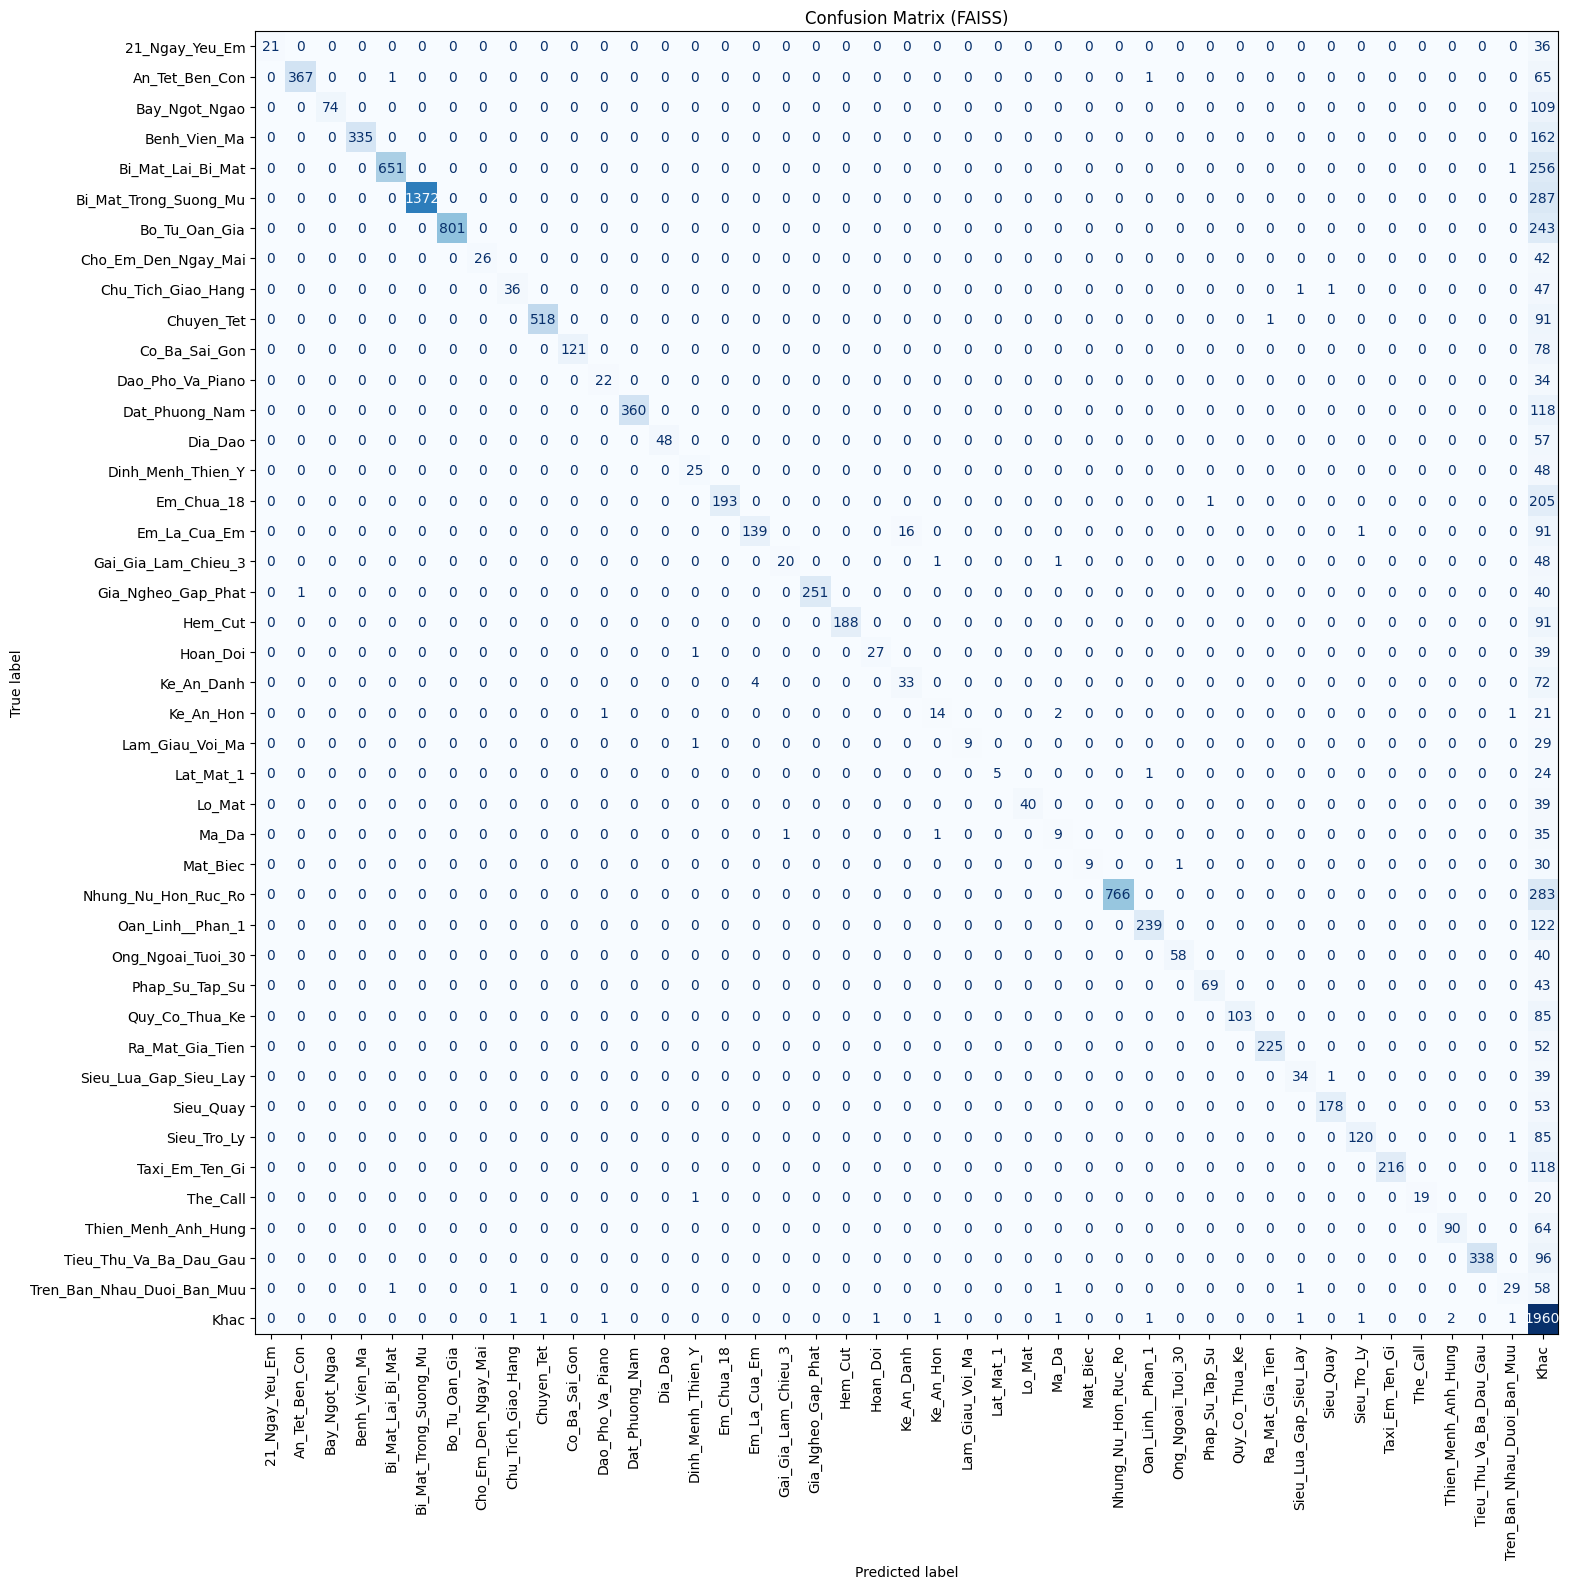


🖼️ Confusion matrix đã được lưu vào 'confusion_matrix_faiss.jpg'

📄 Classification Report:
                            precision    recall  f1-score  accuracy
21_Ngay_Yeu_Em               1.000000  0.368421  0.538462  0.735394
An_Tet_Ben_Con               0.997283  0.845622  0.915212  0.735394
Bay_Ngot_Ngao                1.000000  0.404372  0.575875  0.735394
Benh_Vien_Ma                 1.000000  0.674044  0.805288  0.735394
Bi_Mat_Lai_Bi_Mat            0.996937  0.716960  0.834081  0.735394
Bi_Mat_Trong_Suong_Mu        1.000000  0.827004  0.905312  0.735394
Bo_Tu_Oan_Gia                1.000000  0.767241  0.868293  0.735394
Cho_Em_Den_Ngay_Mai          1.000000  0.382353  0.553191  0.735394
Chu_Tich_Giao_Hang           0.947368  0.423529  0.585366  0.735394
Chuyen_Tet                   0.998073  0.849180  0.917626  0.735394
Co_Ba_Sai_Gon                1.000000  0.608040  0.756250  0.735394
Dao_Pho_Va_Piano             0.916667  0.392857  0.550000  0.735394
Dat_Phuong_Nam          

In [18]:
# Cài đặt các tham số
image_size = 128
test_path = "/kaggle/input/movies-dataset-1/Process_Frames_1/Test"
index_path = "faiss_features.index" 
label_path = "faiss_labels.npy"      
confusion_output_path = "confusion_matrix_faiss.jpg"
csv_output_path = "classification_report_faiss.csv"
similarity_threshold = 0.8  

# ==== Load mô hình và FAISS index ====
# Load mô hình EffcientNetB4
model = EfficientNetB4(include_top=False, weights='imagenet', pooling='avg', input_shape=(image_size, image_size, 3))

# Kiểm tra đường dẫn FAISS index và labels
if not os.path.exists(index_path):
    print(f"❌ Không tìm thấy FAISS index tại: {index_path}")
if not os.path.exists(label_path):
    print(f"❌ Không tìm thấy nhãn tại: {label_path}")

# Load FAISS index và labels
try:
    # Load index trực tiếp cho CPU
    index = faiss.read_index(index_path)

    # Load labels
    index_labels = np.load(label_path)

    print(f"✅ FAISS index đã được tải thành công!")
    print(f"   - Số lượng vectors: {index.ntotal}")
    print(f"   - Kích thước vector: {index.d}")
except Exception as e:
    print(f"❌ Lỗi khi tải FAISS index: {e}")

# ==== Mapping classes ====
classes = {
    1: "21_Ngay_Yeu_Em", 2: "4_Nam_2_Chang_1_Tinh_Yeu", 3: "An_Tet_Ben_Con", 4: "Bay_Ngot_Ngao", 5: "Benh_Vien_Ma",
    6: "Bi_Mat_Lai_Bi_Mat", 7: "Bi_Mat_Trong_Suong_Mu", 8: "Bo_Tu_Oan_Gia", 9: "Cho_Em_Den_Ngay_Mai", 10: "Chu_Tich_Giao_Hang",
    11: "Chuyen_Tet", 12: "Co_Ba_Sai_Gon", 13: "Dao_Pho_Va_Piano", 14: "Dat_Rung_Phuong_Nam", 15: "Dia_Dao",
    16: "Dinh_Menh_Thien_Y", 17: "Doi_Mat_Am_Duong", 18: "Em_Chua_18", 19: "Em_La_Cua_Em", 20: "Gai_Gia_Lam_Chieu_3",
    21: "Gia_Ngheo_Gap_Phat", 22: "Hem_Cut", 23: "Hoan_Doi", 24: "Ke_An_Danh", 25: "Ke_An_Hon",
    26: "Lam_Giau_Voi_Ma", 27: "Lat_Mat_1", 28: "Linh_Mieu_Quy_Nhap_Trang", 29: "Lo_Mat", 30: "Ma_Da",
    31: "Mat_Biec", 32: "Nghe_Sieu_De", 33: "Nhung_Nu_Hon_Ruc_Ro", 34: "Ong_Ngoai_Tuoi_30", 35: "Phap_Su_Tap_Su",
    36: "Quy_Co_Thua_Ke", 37: "Ra_Mat_Gia_Tien", 38: "Sieu_Lua_Gap_Sieu_Lay", 39: "Sieu_Tro_Ly", 40: "Tam_Cam_Chuyen_Chua_Ke",
    41: "Taxi_Em_Ten_Gi", 42: "The_Call", 43: "Thien_Menh_Anh_Hung", 44: "Tieu_Thu_Va_Ba_Dau_Gau", 45: "Tren_Ban_Nhau_Duoi_Ban_Muu",
    46: "Khac"
}
class_to_idx = {name: idx for idx, name in classes.items()}
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

# ==== Duyệt tập test và lấy tất cả ảnh từ mỗi thư mục ====
y_true = []
y_pred = []
all_images = []
for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if not os.path.isdir(class_dir):
        continue
    # Lấy danh sách tất cả ảnh trong thư mục này
    image_files = [
        os.path.join(class_dir, f)
        for f in os.listdir(class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]
    all_images.extend(image_files)

# ==== Dự đoán ====
processing_times = []  # Danh sách lưu thời gian xử lý từng ảnh
for img_path in tqdm(all_images, desc="Testing with FAISS"):
    try:
        start_time = time.time()  # Bắt đầu đo thời gian
        
        folder_name = os.path.basename(os.path.dirname(img_path))
        if folder_name not in class_to_idx:
            print(f"❌ Folder không hợp lệ: {folder_name}")
            continue
        img = image.load_img(img_path, target_size=(image_size, image_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Trích đặc trưng với mô hình
        feature = model.predict(x, verbose=0)
        
        # Chuẩn hóa L2 đặc trưng mẫu truy vấn để phù hợp với vector đã chuẩn hóa trong index
        feature = feature / (np.linalg.norm(feature) + 1e-10)  # Thêm epsilon để tránh chia cho 0
        
        # Đảm bảo đặc trưng có định dạng phù hợp sau khi chuẩn hóa
        feature = feature.astype(np.float32)
        
        # Tìm kiếm k=1 điểm gần nhất trong FAISS index
        D, I = index.search(feature, 1)
        
        # Kiểm tra similarity score từ khoảng cách L2 với vector đã chuẩn hóa
        # Với vector đã chuẩn hóa L2, khoảng cách Euclidean bình phương (D) và cosine similarity có quan hệ:
        # cosine_similarity = 1 - D/2
        # Khoảng cách FAISS là bình phương khoảng cách Euclidean
        euclidean_dist_squared = D[0][0]
        similarity_score = 1 - euclidean_dist_squared/2  # Chuyển đổi khoảng cách thành cosine similarity
        
        # Nếu similarity dưới ngưỡng, gán nhãn "Khác" (43)
        if similarity_score < similarity_threshold:
            pred_label = 46  # Nhãn "Khác"
        else:
            # Lấy nhãn dự đoán từ FAISS
            pred_label_data = index_labels[I[0][0]]
            if isinstance(pred_label_data, (np.ndarray, list)) and len(pred_label_data) > 1:
                pred_label = int(np.argmax(pred_label_data)) + 1
            else:
                pred_label = int(pred_label_data)

        # Lưu kết quả dự đoán và nhãn thực tế
        y_true.append(class_to_idx[folder_name])
        y_pred.append(pred_label)
        
        # Kết thúc đo thời gian và lưu lại
        end_time = time.time()
        processing_time = end_time - start_time
        processing_times.append(processing_time)
        
        # In thông tin cho debug (có thể bỏ comment nếu cần kiểm tra)
        # print(f"Ảnh: {img_path}, Similarity: {similarity_score:.4f}, Nhãn dự đoán: {pred_label} ({idx_to_class[pred_label]})")
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")
        print(f"  Hình dạng đặc trưng: {feature.shape}, Kiểu dữ liệu: {feature.dtype}")

# ==== Đánh giá ====
if len(y_true) == 0:
    print("❌ Không có dữ liệu để đánh giá!")
else:
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    accuracy = np.mean(y_true == y_pred)
    print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")
    print(f"✅ Đúng: {np.sum(y_true == y_pred)} / ❌ Sai: {np.sum(y_true != y_pred)}")
    
    # Tính thời gian xử lý trung bình cho một ảnh
    avg_processing_time = np.mean(processing_times)
    print(f"\n⏱️ Thời gian xử lý trung bình: {avg_processing_time:.4f} giây/ảnh")
    print(f"⏱️ Tổng thời gian xử lý: {sum(processing_times):.2f} giây cho {len(processing_times)} ảnh")
    
    # ==== Confusion Matrix ====
    cm = confusion_matrix(y_true, y_pred)
    class_labels = [classes[i] for i in sorted(classes.keys())]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    fig, ax = plt.subplots(figsize=(16, 16))
    disp.plot(xticks_rotation=90, cmap='Blues', ax=ax, colorbar=False)
    plt.title("Confusion Matrix (FAISS)")
    plt.tight_layout()
    plt.savefig(confusion_output_path, dpi=300)
    plt.show()
    print(f"\n🖼️ Confusion matrix đã được lưu vào '{confusion_output_path}'")
    
    # ==== Classification Report ====
    print("\n📄 Classification Report:")
    report = classification_report(
        y_true, y_pred, target_names=class_labels,
        digits=2, output_dict=True
    )
    # Chuyển báo cáo phân loại thành DataFrame
    report_df = pd.DataFrame(report).transpose()
    if "accuracy" not in report_df.columns:
        report_df["accuracy"] = accuracy
    print(report_df[["precision", "recall", "f1-score", "accuracy"]])
    
    # Hiển thị các tham số chung cho toàn bộ chương trình
    avg_precision = np.mean(report_df['precision'])
    avg_recall = np.mean(report_df['recall'])
    avg_f1 = np.mean(report_df['f1-score'])
    avg_processing_time = np.mean(processing_times)
    
    print("\n📝 Các tham số đánh giá chung:")
    print(f"  - Precision: {avg_precision:.2f}")
    print(f"  - Recall: {avg_recall:.2f}")
    print(f"  - F1-score: {avg_f1:.2f}")
    print(f"  - Accuracy: {accuracy * 100:.2f}%")
    print(f"  - Thời gian xử lý trung bình: {avg_processing_time:.4f} giây/ảnh")
    
    # Lưu báo cáo chi tiết vào tệp CSV
    report_df.to_csv(csv_output_path, index=True)
    print(f"\n📊 Báo cáo phân loại đã được lưu vào '{csv_output_path}'")
    
    # Lưu các tham số đánh giá chung vào tệp CSV
    evaluation_metrics = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1-score': avg_f1,
        'accuracy': accuracy,
        'avg_processing_time': avg_processing_time
    }
    evaluation_df = pd.DataFrame([evaluation_metrics])
    evaluation_df.to_csv('evaluation_metrics_faiss.csv', index=False)
    print(f"\n📊 Các tham số đánh giá chung đã được lưu vào 'evaluation_metrics_faiss.csv'")
    
    # Lưu cả báo cáo phân loại và các tham số chung vào một tệp CSV
    final_df = report_df.copy()
    final_df['average_precision'] = avg_precision
    final_df['average_recall'] = avg_recall
    final_df['average_f1-score'] = avg_f1
    final_df['average_accuracy'] = accuracy
    final_df['avg_processing_time'] = avg_processing_time
    final_df.to_csv('final_classification_report_faiss.csv', index=True)
    print(f"\n📊 Báo cáo phân loại cuối cùng đã được lưu vào 'final_classification_report_faiss.csv'")

# InceptionV3 + FAISS Index

In [21]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Giả sử biến train_df là tf.data.Dataset đã chuẩn hóa và batch đúng
num_batches = tf.data.experimental.cardinality(train_df).numpy()
strategy = tf.distribute.MirroredStrategy()

# Khởi tạo InceptionV3 trong context của strategy
with strategy.scope():
    base_model_inceptionv3 = InceptionV3(
        include_top=False,
        weights='imagenet',
        pooling='avg',
        input_shape=(image_size, image_size, 3)
    )

# Trích đặc trưng và nhãn
all_features = []
all_labels = []

for images, labels in tqdm(train_df, total=num_batches, desc="Extracting features with InceptionV3"):
    images_pp = preprocess_input(images)
    features_batch = base_model_inceptionv3(images_pp, training=False)
    all_features.append(features_batch.numpy())
    all_labels.append(labels.numpy())

features_array = np.concatenate(all_features, axis=0)   
labels_array = np.concatenate(all_labels, axis=0)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Extracting features with InceptionV3: 100%|██████████| 295/295 [01:27<00:00,  3.36it/s]


In [22]:
import faiss
import numpy as np

# Chuẩn hóa L2 cho mỗi vector (độ dài = 1)
def l2_normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / (norms + 1e-10)  # thêm epsilon để tránh chia cho 0

# Chuẩn hóa vector đặc trưng
normalized_features = l2_normalize(features_array.astype('float32'))

# Kích thước vector đặc trưng
d = normalized_features.shape[1]

# Khởi tạo index FAISS sử dụng khoảng cách Euclidean
index = faiss.IndexFlatL2(d)

# Thêm vector đã chuẩn hóa vào index
index.add(normalized_features)
print("Đã thêm", index.ntotal, "vector đã chuẩn hóa vào FAISS index.")

# Lưu index và nhãn
faiss.write_index(index, "faiss_features.index")
np.save("faiss_labels.npy", labels_array)

Đã thêm 37705 vector đã chuẩn hóa vào FAISS index.


In [ ]:
# Đọc lại FAISS index và nhãn
index = faiss.read_index("faiss_features.index")
labels_array = np.load("faiss_labels.npy")

✅ FAISS index đã được tải thành công!
   - Số lượng vectors: 37705
   - Kích thước vector: 2048


Testing with FAISS: 100%|██████████| 13813/13813 [23:06<00:00,  9.96it/s]



✅ Accuracy: 72.69%
✅ Đúng: 10040 / ❌ Sai: 3773

⏱️ Thời gian xử lý trung bình: 0.0999 giây/ảnh
⏱️ Tổng thời gian xử lý: 1379.71 giây cho 13813 ảnh


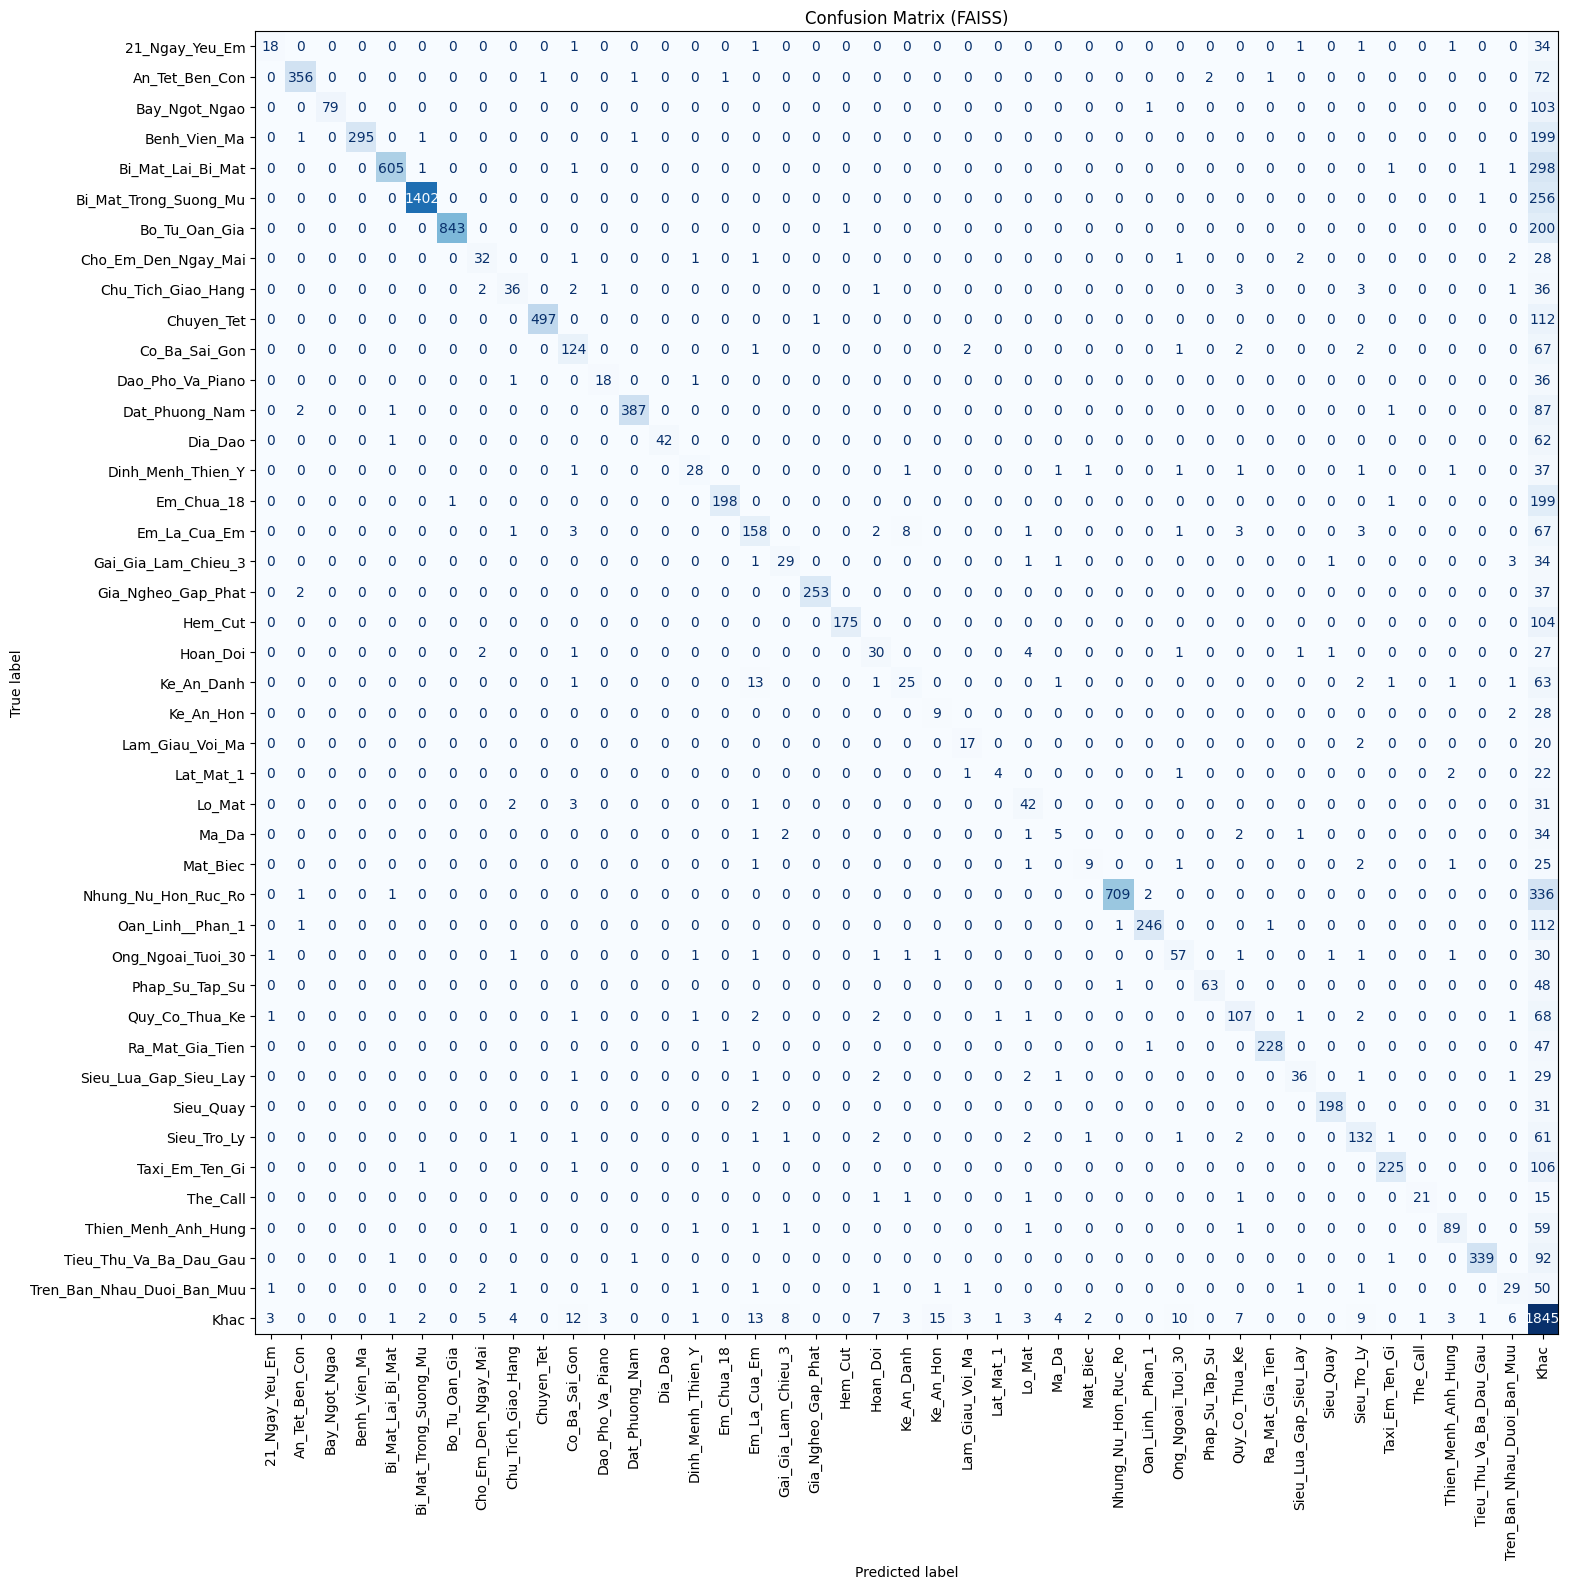


🖼️ Confusion matrix đã được lưu vào 'confusion_matrix_faiss.jpg'

📄 Classification Report:
                            precision    recall  f1-score  accuracy
21_Ngay_Yeu_Em               0.750000  0.315789  0.444444  0.726852
An_Tet_Ben_Con               0.980716  0.820276  0.893350  0.726852
Bay_Ngot_Ngao                1.000000  0.431694  0.603053  0.726852
Benh_Vien_Ma                 1.000000  0.593561  0.744949  0.726852
Bi_Mat_Lai_Bi_Mat            0.991803  0.666300  0.797101  0.726852
Bi_Mat_Trong_Suong_Mu        0.996446  0.845087  0.914547  0.726852
Bo_Tu_Oan_Gia                0.998815  0.807471  0.893008  0.726852
Cho_Em_Den_Ngay_Mai          0.744186  0.470588  0.576577  0.726852
Chu_Tich_Giao_Hang           0.750000  0.423529  0.541353  0.726852
Chuyen_Tet                   0.997992  0.814754  0.897112  0.726852
Co_Ba_Sai_Gon                0.805195  0.623116  0.702550  0.726852
Dao_Pho_Va_Piano             0.782609  0.321429  0.455696  0.726852
Dat_Phuong_Nam          

In [23]:
# Cài đặt các tham số
image_size = 128
test_path = "/kaggle/input/movies-dataset-1/Process_Frames_1/Test"
index_path = "faiss_features.index" 
label_path = "faiss_labels.npy"      
confusion_output_path = "confusion_matrix_faiss.jpg"
csv_output_path = "classification_report_faiss.csv"
similarity_threshold = 0.8  

# ==== Load mô hình và FAISS index ====
# Load mô hình InceptionV3
model = InceptionV3(include_top=False, weights='imagenet', pooling='avg', input_shape=(image_size, image_size, 3))

# Kiểm tra đường dẫn FAISS index và labels
if not os.path.exists(index_path):
    print(f"❌ Không tìm thấy FAISS index tại: {index_path}")
if not os.path.exists(label_path):
    print(f"❌ Không tìm thấy nhãn tại: {label_path}")

# Load FAISS index và labels
try:
    # Load index trực tiếp cho CPU
    index = faiss.read_index(index_path)

    # Load labels
    index_labels = np.load(label_path)

    print(f"✅ FAISS index đã được tải thành công!")
    print(f"   - Số lượng vectors: {index.ntotal}")
    print(f"   - Kích thước vector: {index.d}")
except Exception as e:
    print(f"❌ Lỗi khi tải FAISS index: {e}")

# ==== Mapping classes ====
classes = {
    1: "21_Ngay_Yeu_Em", 2: "4_Nam_2_Chang_1_Tinh_Yeu", 3: "An_Tet_Ben_Con", 4: "Bay_Ngot_Ngao", 5: "Benh_Vien_Ma",
    6: "Bi_Mat_Lai_Bi_Mat", 7: "Bi_Mat_Trong_Suong_Mu", 8: "Bo_Tu_Oan_Gia", 9: "Cho_Em_Den_Ngay_Mai", 10: "Chu_Tich_Giao_Hang",
    11: "Chuyen_Tet", 12: "Co_Ba_Sai_Gon", 13: "Dao_Pho_Va_Piano", 14: "Dat_Rung_Phuong_Nam", 15: "Dia_Dao",
    16: "Dinh_Menh_Thien_Y", 17: "Doi_Mat_Am_Duong", 18: "Em_Chua_18", 19: "Em_La_Cua_Em", 20: "Gai_Gia_Lam_Chieu_3",
    21: "Gia_Ngheo_Gap_Phat", 22: "Hem_Cut", 23: "Hoan_Doi", 24: "Ke_An_Danh", 25: "Ke_An_Hon",
    26: "Lam_Giau_Voi_Ma", 27: "Lat_Mat_1", 28: "Linh_Mieu_Quy_Nhap_Trang", 29: "Lo_Mat", 30: "Ma_Da",
    31: "Mat_Biec", 32: "Nghe_Sieu_De", 33: "Nhung_Nu_Hon_Ruc_Ro", 34: "Ong_Ngoai_Tuoi_30", 35: "Phap_Su_Tap_Su",
    36: "Quy_Co_Thua_Ke", 37: "Ra_Mat_Gia_Tien", 38: "Sieu_Lua_Gap_Sieu_Lay", 39: "Sieu_Tro_Ly", 40: "Tam_Cam_Chuyen_Chua_Ke",
    41: "Taxi_Em_Ten_Gi", 42: "The_Call", 43: "Thien_Menh_Anh_Hung", 44: "Tieu_Thu_Va_Ba_Dau_Gau", 45: "Tren_Ban_Nhau_Duoi_Ban_Muu",
    46: "Khac"
}
class_to_idx = {name: idx for idx, name in classes.items()}
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

# ==== Duyệt tập test và lấy tất cả ảnh từ mỗi thư mục ====
y_true = []
y_pred = []
all_images = []
for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if not os.path.isdir(class_dir):
        continue
    # Lấy danh sách tất cả ảnh trong thư mục này
    image_files = [
        os.path.join(class_dir, f)
        for f in os.listdir(class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]
    all_images.extend(image_files)

# ==== Dự đoán ====
processing_times = []  # Danh sách lưu thời gian xử lý từng ảnh
for img_path in tqdm(all_images, desc="Testing with FAISS"):
    try:
        start_time = time.time()  # Bắt đầu đo thời gian
        
        folder_name = os.path.basename(os.path.dirname(img_path))
        if folder_name not in class_to_idx:
            print(f"❌ Folder không hợp lệ: {folder_name}")
            continue
        img = image.load_img(img_path, target_size=(image_size, image_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Trích đặc trưng với mô hình
        feature = model.predict(x, verbose=0)
        
        # Chuẩn hóa L2 đặc trưng mẫu truy vấn để phù hợp với vector đã chuẩn hóa trong index
        feature = feature / (np.linalg.norm(feature) + 1e-10)  # Thêm epsilon để tránh chia cho 0
        
        # Đảm bảo đặc trưng có định dạng phù hợp sau khi chuẩn hóa
        feature = feature.astype(np.float32)
        
        # Tìm kiếm k=1 điểm gần nhất trong FAISS index
        D, I = index.search(feature, 1)
        
        # Kiểm tra similarity score từ khoảng cách L2 với vector đã chuẩn hóa
        # Với vector đã chuẩn hóa L2, khoảng cách Euclidean bình phương (D) và cosine similarity có quan hệ:
        # cosine_similarity = 1 - D/2
        # Khoảng cách FAISS là bình phương khoảng cách Euclidean
        euclidean_dist_squared = D[0][0]
        similarity_score = 1 - euclidean_dist_squared/2  # Chuyển đổi khoảng cách thành cosine similarity
        
        # Nếu similarity dưới ngưỡng, gán nhãn "Khác" (43)
        if similarity_score < similarity_threshold:
            pred_label = 46  # Nhãn "Khác"
        else:
            # Lấy nhãn dự đoán từ FAISS
            pred_label_data = index_labels[I[0][0]]
            if isinstance(pred_label_data, (np.ndarray, list)) and len(pred_label_data) > 1:
                pred_label = int(np.argmax(pred_label_data)) + 1
            else:
                pred_label = int(pred_label_data)

        # Lưu kết quả dự đoán và nhãn thực tế
        y_true.append(class_to_idx[folder_name])
        y_pred.append(pred_label)
        
        # Kết thúc đo thời gian và lưu lại
        end_time = time.time()
        processing_time = end_time - start_time
        processing_times.append(processing_time)
        
        # In thông tin cho debug (có thể bỏ comment nếu cần kiểm tra)
        # print(f"Ảnh: {img_path}, Similarity: {similarity_score:.4f}, Nhãn dự đoán: {pred_label} ({idx_to_class[pred_label]})")
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")
        print(f"  Hình dạng đặc trưng: {feature.shape}, Kiểu dữ liệu: {feature.dtype}")

# ==== Đánh giá ====
if len(y_true) == 0:
    print("❌ Không có dữ liệu để đánh giá!")
else:
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    accuracy = np.mean(y_true == y_pred)
    print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")
    print(f"✅ Đúng: {np.sum(y_true == y_pred)} / ❌ Sai: {np.sum(y_true != y_pred)}")
    
    # Tính thời gian xử lý trung bình cho một ảnh
    avg_processing_time = np.mean(processing_times)
    print(f"\n⏱️ Thời gian xử lý trung bình: {avg_processing_time:.4f} giây/ảnh")
    print(f"⏱️ Tổng thời gian xử lý: {sum(processing_times):.2f} giây cho {len(processing_times)} ảnh")
    
    # ==== Confusion Matrix ====
    cm = confusion_matrix(y_true, y_pred)
    class_labels = [classes[i] for i in sorted(classes.keys())]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    fig, ax = plt.subplots(figsize=(16, 16))
    disp.plot(xticks_rotation=90, cmap='Blues', ax=ax, colorbar=False)
    plt.title("Confusion Matrix (FAISS)")
    plt.tight_layout()
    plt.savefig(confusion_output_path, dpi=300)
    plt.show()
    print(f"\n🖼️ Confusion matrix đã được lưu vào '{confusion_output_path}'")
    
    # ==== Classification Report ====
    print("\n📄 Classification Report:")
    report = classification_report(
        y_true, y_pred, target_names=class_labels,
        digits=2, output_dict=True
    )
    # Chuyển báo cáo phân loại thành DataFrame
    report_df = pd.DataFrame(report).transpose()
    if "accuracy" not in report_df.columns:
        report_df["accuracy"] = accuracy
    print(report_df[["precision", "recall", "f1-score", "accuracy"]])
    
    # Hiển thị các tham số chung cho toàn bộ chương trình
    avg_precision = np.mean(report_df['precision'])
    avg_recall = np.mean(report_df['recall'])
    avg_f1 = np.mean(report_df['f1-score'])
    avg_processing_time = np.mean(processing_times)
    
    print("\n📝 Các tham số đánh giá chung:")
    print(f"  - Precision: {avg_precision:.2f}")
    print(f"  - Recall: {avg_recall:.2f}")
    print(f"  - F1-score: {avg_f1:.2f}")
    print(f"  - Accuracy: {accuracy * 100:.2f}%")
    print(f"  - Thời gian xử lý trung bình: {avg_processing_time:.4f} giây/ảnh")
    
    # Lưu báo cáo chi tiết vào tệp CSV
    report_df.to_csv(csv_output_path, index=True)
    print(f"\n📊 Báo cáo phân loại đã được lưu vào '{csv_output_path}'")
    
    # Lưu các tham số đánh giá chung vào tệp CSV
    evaluation_metrics = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1-score': avg_f1,
        'accuracy': accuracy,
        'avg_processing_time': avg_processing_time
    }
    evaluation_df = pd.DataFrame([evaluation_metrics])
    evaluation_df.to_csv('evaluation_metrics_faiss.csv', index=False)
    print(f"\n📊 Các tham số đánh giá chung đã được lưu vào 'evaluation_metrics_faiss.csv'")
    
    # Lưu cả báo cáo phân loại và các tham số chung vào một tệp CSV
    final_df = report_df.copy()
    final_df['average_precision'] = avg_precision
    final_df['average_recall'] = avg_recall
    final_df['average_f1-score'] = avg_f1
    final_df['average_accuracy'] = accuracy
    final_df['avg_processing_time'] = avg_processing_time
    final_df.to_csv('final_classification_report_faiss.csv', index=True)
    print(f"\n📊 Báo cáo phân loại cuối cùng đã được lưu vào 'final_classification_report_faiss.csv'")

# VGG16 + FAISS Index

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Số batch
num_batches = tf.data.experimental.cardinality(train_df).numpy()

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    base_model_vgg16 = VGG16(
        include_top=False,
        weights='imagenet',
        pooling='avg',
        input_shape=(image_size, image_size, 3)
    )

# Nơi lưu đặc trưng và nhãn
all_features = []
all_labels = []

for images, labels in tqdm(train_df, total=num_batches, desc="Extracting features"):
    images_pp = preprocess_input(images)
    features_batch = base_model_vgg16(images_pp, training=False)
    all_features.append(features_batch.numpy())
    all_labels.append(labels.numpy())

# Nối đặc trưng và nhãn
features_array = np.concatenate(all_features, axis=0)
labels_array = np.concatenate(all_labels, axis=0)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Extracting features: 100%|██████████| 295/295 [00:38<00:00,  7.61it/s]


In [27]:
import faiss
import numpy as np

# Chuẩn hóa L2 cho mỗi vector (độ dài = 1)
def l2_normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / (norms + 1e-10)  # thêm epsilon để tránh chia cho 0

# Chuẩn hóa vector đặc trưng
normalized_features = l2_normalize(features_array.astype('float32'))

# Kích thước vector đặc trưng
d = normalized_features.shape[1]

# Khởi tạo index FAISS sử dụng khoảng cách Euclidean
index = faiss.IndexFlatL2(d)

# Thêm vector đã chuẩn hóa vào index
index.add(normalized_features)
print("Đã thêm", index.ntotal, "vector đã chuẩn hóa vào FAISS index.")

# Lưu index và nhãn
faiss.write_index(index, "faiss_features.index")
np.save("faiss_labels.npy", labels_array)

Đã thêm 37705 vector đã chuẩn hóa vào FAISS index.


In [ ]:
# Đọc lại FAISS index và nhãn
index = faiss.read_index("faiss_features.index")
labels_array = np.load("faiss_labels.npy")

✅ FAISS index đã được tải thành công!
   - Số lượng vectors: 37705
   - Kích thước vector: 512


Testing with FAISS: 100%|██████████| 13813/13813 [16:59<00:00, 13.56it/s]



✅ Accuracy: 85.78%
✅ Đúng: 11849 / ❌ Sai: 1964

⏱️ Thời gian xử lý trung bình: 0.0734 giây/ảnh
⏱️ Tổng thời gian xử lý: 1013.49 giây cho 13813 ảnh


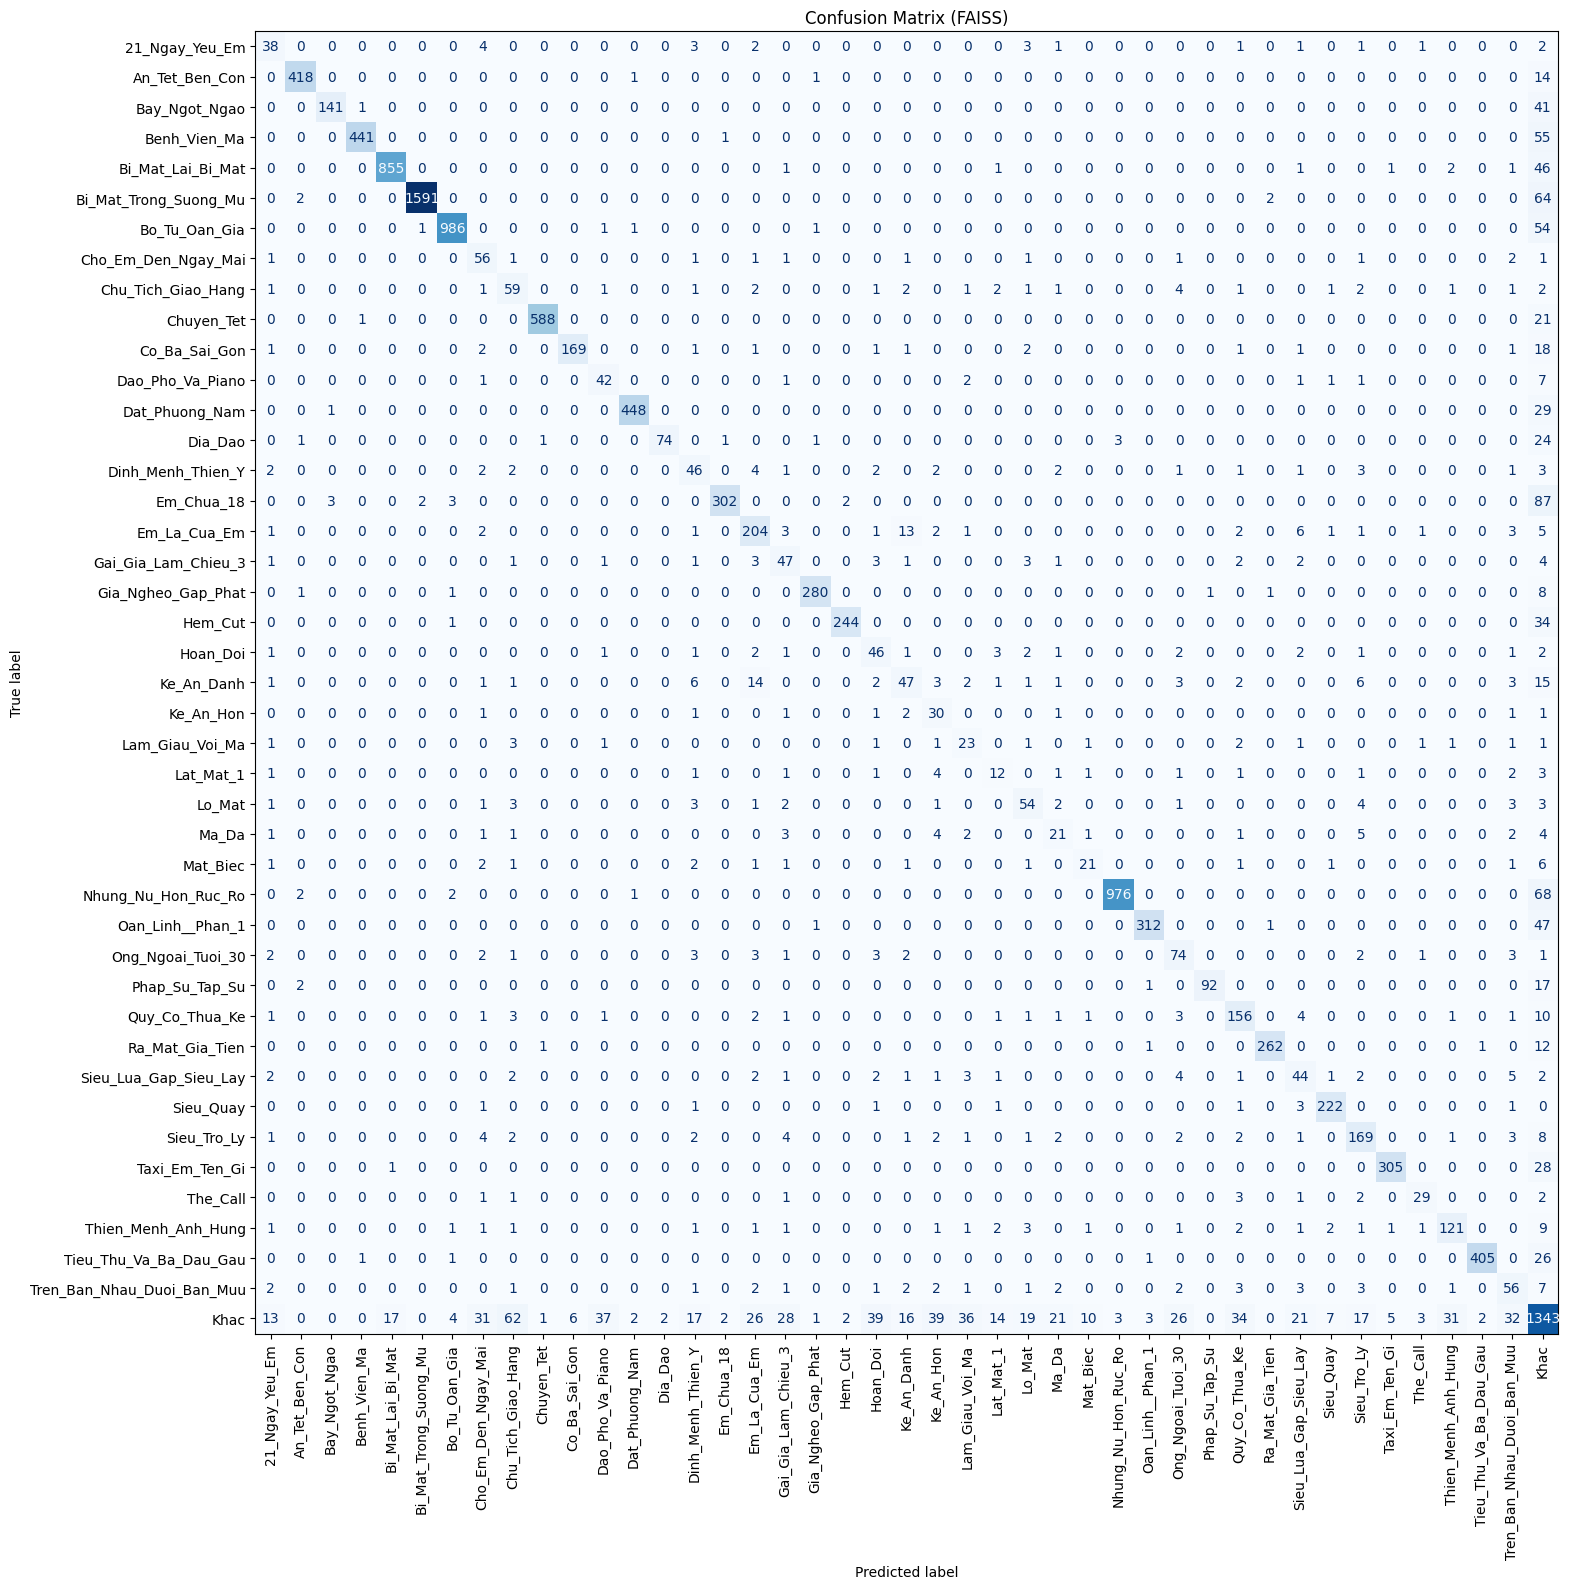


🖼️ Confusion matrix đã được lưu vào 'confusion_matrix_faiss.jpg'

📄 Classification Report:
                            precision    recall  f1-score  accuracy
21_Ngay_Yeu_Em               0.513514  0.666667  0.580153  0.857815
An_Tet_Ben_Con               0.981221  0.963134  0.972093  0.857815
Bay_Ngot_Ngao                0.972414  0.770492  0.859756  0.857815
Benh_Vien_Ma                 0.993243  0.887324  0.937301  0.857815
Bi_Mat_Lai_Bi_Mat            0.979381  0.941630  0.960135  0.857815
Bi_Mat_Trong_Suong_Mu        0.998118  0.959011  0.978174  0.857815
Bo_Tu_Oan_Gia                0.986987  0.944444  0.965247  0.857815
Cho_Em_Den_Ngay_Mai          0.486957  0.823529  0.612022  0.857815
Chu_Tich_Giao_Hang           0.406897  0.694118  0.513043  0.857815
Chuyen_Tet                   0.994924  0.963934  0.979184  0.857815
Co_Ba_Sai_Gon                0.965714  0.849246  0.903743  0.857815
Dao_Pho_Va_Piano             0.494118  0.750000  0.595745  0.857815
Dat_Phuong_Nam          

In [28]:
# Cài đặt các tham số
image_size = 128
test_path = "/kaggle/input/movies-dataset-1/Process_Frames_1/Test"
index_path = "faiss_features.index" 
label_path = "faiss_labels.npy"      
confusion_output_path = "confusion_matrix_faiss.jpg"
csv_output_path = "classification_report_faiss.csv"
similarity_threshold = 0.8  

# ==== Load mô hình và FAISS index ====
# Load mô hình InceptionV3
model = VGG16(include_top=False, weights='imagenet', pooling='avg', input_shape=(image_size, image_size, 3))

# Kiểm tra đường dẫn FAISS index và labels
if not os.path.exists(index_path):
    print(f"❌ Không tìm thấy FAISS index tại: {index_path}")
if not os.path.exists(label_path):
    print(f"❌ Không tìm thấy nhãn tại: {label_path}")

# Load FAISS index và labels
try:
    # Load index trực tiếp cho CPU
    index = faiss.read_index(index_path)

    # Load labels
    index_labels = np.load(label_path)

    print(f"✅ FAISS index đã được tải thành công!")
    print(f"   - Số lượng vectors: {index.ntotal}")
    print(f"   - Kích thước vector: {index.d}")
except Exception as e:
    print(f"❌ Lỗi khi tải FAISS index: {e}")

# ==== Mapping classes ====
classes = {
    1: "21_Ngay_Yeu_Em", 2: "4_Nam_2_Chang_1_Tinh_Yeu", 3: "An_Tet_Ben_Con", 4: "Bay_Ngot_Ngao", 5: "Benh_Vien_Ma",
    6: "Bi_Mat_Lai_Bi_Mat", 7: "Bi_Mat_Trong_Suong_Mu", 8: "Bo_Tu_Oan_Gia", 9: "Cho_Em_Den_Ngay_Mai", 10: "Chu_Tich_Giao_Hang",
    11: "Chuyen_Tet", 12: "Co_Ba_Sai_Gon", 13: "Dao_Pho_Va_Piano", 14: "Dat_Rung_Phuong_Nam", 15: "Dia_Dao",
    16: "Dinh_Menh_Thien_Y", 17: "Doi_Mat_Am_Duong", 18: "Em_Chua_18", 19: "Em_La_Cua_Em", 20: "Gai_Gia_Lam_Chieu_3",
    21: "Gia_Ngheo_Gap_Phat", 22: "Hem_Cut", 23: "Hoan_Doi", 24: "Ke_An_Danh", 25: "Ke_An_Hon",
    26: "Lam_Giau_Voi_Ma", 27: "Lat_Mat_1", 28: "Linh_Mieu_Quy_Nhap_Trang", 29: "Lo_Mat", 30: "Ma_Da",
    31: "Mat_Biec", 32: "Nghe_Sieu_De", 33: "Nhung_Nu_Hon_Ruc_Ro", 34: "Ong_Ngoai_Tuoi_30", 35: "Phap_Su_Tap_Su",
    36: "Quy_Co_Thua_Ke", 37: "Ra_Mat_Gia_Tien", 38: "Sieu_Lua_Gap_Sieu_Lay", 39: "Sieu_Tro_Ly", 40: "Tam_Cam_Chuyen_Chua_Ke",
    41: "Taxi_Em_Ten_Gi", 42: "The_Call", 43: "Thien_Menh_Anh_Hung", 44: "Tieu_Thu_Va_Ba_Dau_Gau", 45: "Tren_Ban_Nhau_Duoi_Ban_Muu",
    46: "Khac"
}
class_to_idx = {name: idx for idx, name in classes.items()}
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

# ==== Duyệt tập test và lấy tất cả ảnh từ mỗi thư mục ====
y_true = []
y_pred = []
all_images = []
for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if not os.path.isdir(class_dir):
        continue
    # Lấy danh sách tất cả ảnh trong thư mục này
    image_files = [
        os.path.join(class_dir, f)
        for f in os.listdir(class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]
    all_images.extend(image_files)

# ==== Dự đoán ====
processing_times = []  # Danh sách lưu thời gian xử lý từng ảnh
for img_path in tqdm(all_images, desc="Testing with FAISS"):
    try:
        start_time = time.time()  # Bắt đầu đo thời gian
        
        folder_name = os.path.basename(os.path.dirname(img_path))
        if folder_name not in class_to_idx:
            print(f"❌ Folder không hợp lệ: {folder_name}")
            continue
        img = image.load_img(img_path, target_size=(image_size, image_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Trích đặc trưng với mô hình
        feature = model.predict(x, verbose=0)
        
        # Chuẩn hóa L2 đặc trưng mẫu truy vấn để phù hợp với vector đã chuẩn hóa trong index
        feature = feature / (np.linalg.norm(feature) + 1e-10)  # Thêm epsilon để tránh chia cho 0
        
        # Đảm bảo đặc trưng có định dạng phù hợp sau khi chuẩn hóa
        feature = feature.astype(np.float32)
        
        # Tìm kiếm k=1 điểm gần nhất trong FAISS index
        D, I = index.search(feature, 1)
        
        # Kiểm tra similarity score từ khoảng cách L2 với vector đã chuẩn hóa
        # Với vector đã chuẩn hóa L2, khoảng cách Euclidean bình phương (D) và cosine similarity có quan hệ:
        # cosine_similarity = 1 - D/2
        # Khoảng cách FAISS là bình phương khoảng cách Euclidean
        euclidean_dist_squared = D[0][0]
        similarity_score = 1 - euclidean_dist_squared/2  # Chuyển đổi khoảng cách thành cosine similarity
        
        # Nếu similarity dưới ngưỡng, gán nhãn "Khác" (43)
        if similarity_score < similarity_threshold:
            pred_label = 46  # Nhãn "Khác"
        else:
            # Lấy nhãn dự đoán từ FAISS
            pred_label_data = index_labels[I[0][0]]
            if isinstance(pred_label_data, (np.ndarray, list)) and len(pred_label_data) > 1:
                pred_label = int(np.argmax(pred_label_data)) + 1
            else:
                pred_label = int(pred_label_data)

        # Lưu kết quả dự đoán và nhãn thực tế
        y_true.append(class_to_idx[folder_name])
        y_pred.append(pred_label)
        
        # Kết thúc đo thời gian và lưu lại
        end_time = time.time()
        processing_time = end_time - start_time
        processing_times.append(processing_time)
        
        # In thông tin cho debug (có thể bỏ comment nếu cần kiểm tra)
        # print(f"Ảnh: {img_path}, Similarity: {similarity_score:.4f}, Nhãn dự đoán: {pred_label} ({idx_to_class[pred_label]})")
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")
        print(f"  Hình dạng đặc trưng: {feature.shape}, Kiểu dữ liệu: {feature.dtype}")

# ==== Đánh giá ====
if len(y_true) == 0:
    print("❌ Không có dữ liệu để đánh giá!")
else:
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    accuracy = np.mean(y_true == y_pred)
    print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")
    print(f"✅ Đúng: {np.sum(y_true == y_pred)} / ❌ Sai: {np.sum(y_true != y_pred)}")
    
    # Tính thời gian xử lý trung bình cho một ảnh
    avg_processing_time = np.mean(processing_times)
    print(f"\n⏱️ Thời gian xử lý trung bình: {avg_processing_time:.4f} giây/ảnh")
    print(f"⏱️ Tổng thời gian xử lý: {sum(processing_times):.2f} giây cho {len(processing_times)} ảnh")
    
    # ==== Confusion Matrix ====
    cm = confusion_matrix(y_true, y_pred)
    class_labels = [classes[i] for i in sorted(classes.keys())]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    fig, ax = plt.subplots(figsize=(16, 16))
    disp.plot(xticks_rotation=90, cmap='Blues', ax=ax, colorbar=False)
    plt.title("Confusion Matrix (FAISS)")
    plt.tight_layout()
    plt.savefig(confusion_output_path, dpi=300)
    plt.show()
    print(f"\n🖼️ Confusion matrix đã được lưu vào '{confusion_output_path}'")
    
    # ==== Classification Report ====
    print("\n📄 Classification Report:")
    report = classification_report(
        y_true, y_pred, target_names=class_labels,
        digits=2, output_dict=True
    )
    # Chuyển báo cáo phân loại thành DataFrame
    report_df = pd.DataFrame(report).transpose()
    if "accuracy" not in report_df.columns:
        report_df["accuracy"] = accuracy
    print(report_df[["precision", "recall", "f1-score", "accuracy"]])
    
    # Hiển thị các tham số chung cho toàn bộ chương trình
    avg_precision = np.mean(report_df['precision'])
    avg_recall = np.mean(report_df['recall'])
    avg_f1 = np.mean(report_df['f1-score'])
    avg_processing_time = np.mean(processing_times)
    
    print("\n📝 Các tham số đánh giá chung:")
    print(f"  - Precision: {avg_precision:.2f}")
    print(f"  - Recall: {avg_recall:.2f}")
    print(f"  - F1-score: {avg_f1:.2f}")
    print(f"  - Accuracy: {accuracy * 100:.2f}%")
    print(f"  - Thời gian xử lý trung bình: {avg_processing_time:.4f} giây/ảnh")
    
    # Lưu báo cáo chi tiết vào tệp CSV
    report_df.to_csv(csv_output_path, index=True)
    print(f"\n📊 Báo cáo phân loại đã được lưu vào '{csv_output_path}'")
    
    # Lưu các tham số đánh giá chung vào tệp CSV
    evaluation_metrics = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1-score': avg_f1,
        'accuracy': accuracy,
        'avg_processing_time': avg_processing_time
    }
    evaluation_df = pd.DataFrame([evaluation_metrics])
    evaluation_df.to_csv('evaluation_metrics_faiss.csv', index=False)
    print(f"\n📊 Các tham số đánh giá chung đã được lưu vào 'evaluation_metrics_faiss.csv'")
    
    # Lưu cả báo cáo phân loại và các tham số chung vào một tệp CSV
    final_df = report_df.copy()
    final_df['average_precision'] = avg_precision
    final_df['average_recall'] = avg_recall
    final_df['average_f1-score'] = avg_f1
    final_df['average_accuracy'] = accuracy
    final_df['avg_processing_time'] = avg_processing_time
    final_df.to_csv('final_classification_report_faiss.csv', index=True)
    print(f"\n📊 Báo cáo phân loại cuối cùng đã được lưu vào 'final_classification_report_faiss.csv'")